In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
import missingno as msno
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
from scipy.stats import kstest, shapiro, normaltest,norm,binom,ttest_ind,ttest_1samp,ttest_rel,chi2_contingency,wilcoxon,mannwhitneyu
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.proportion import proportions_ztest
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
import folium
import geocoder
import pyforest
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from geopy.distance import geodesic, great_circle
from folium.plugins import HeatMap, MarkerCluster
from datetime import datetime
cf.go_offline()
import math
from math import atan2, degrees
from operator import attrgetter, itemgetter
import datetime as dt
from lifetimes.plotting import plot_period_transactions
from plotly.tools import FigureFactory as ff
from PIL import Image
import plotly.graph_objs as go
from plotly.offline import iplot
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option("display.width", 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')

# Business Understanding

<img src="https://files.oaiusercontent.com/file-0Aay1U1vKYWX2Z1tF3R8auAO?se=2024-08-26T08%3A21%3A19Z&sp=r&sv=2024-08-04&sr=b&rscc=max-age%3D604800%2C%20immutable%2C%20private&rscd=attachment%3B%20filename%3Dac874e9f-13ae-4181-bbcc-f5d74110898f.webp&sig=XN7qZQZPqx2ZwQ1vYi8Zw228M6dEJeuXHLcYsPem6wA%3D">

<img src="https://i0.wp.com/www.anekatrip.com/wp-content/uploads/2019/09/logo-transjakarta.png?resize=770%2C139&ssl=1">


# Latar Belakang
Transjakarta adalah sistem transportasi umum berbasis bus yang telah menjadi bagian integral dari mobilitas warga Jakarta. Sebagai salah satu solusi utama untuk mengurangi kemacetan dan menyediakan transportasi yang terjangkau, Transjakarta menghadirkan berbagai rute yang mencakup seluruh wilayah Jakarta dan sekitarnya. Namun, dengan meningkatnya populasi dan perkembangan wilayah perkotaan, Transjakarta menghadapi tantangan dalam hal efisiensi operasional, optimalisasi rute, dan keberlanjutan operasional. Efisiensi dan efektivitas rute menjadi krusial untuk memastikan pelayanan yang optimal dan memaksimalkan kepuasan penumpang, sementara keberlanjutan operasional sangat penting untuk menjaga agar sistem transportasi ini tetap berjalan dengan baik di masa depan.

### Tujuan Bisnis
Tujuan utama dari inisiatif ini adalah untuk meningkatkan kinerja dan efisiensi operasional Transjakarta, sehingga dapat memberikan layanan yang lebih baik bagi masyarakat, serta memastikan keberlanjutan jangka panjang dari sistem transportasi ini. Secara khusus, tujuan ini dapat dirinci sebagai berikut:

- Optimalisasi Rute: Mengidentifikasi dan mengimplementasikan rute-rute yang lebih efisien berdasarkan pola penggunaan penumpang, waktu tempuh, dan kapasitas penumpang, sehingga dapat meminimalkan waktu perjalanan dan memaksimalkan jumlah penumpang per rute.

- Efisiensi Operasional:Mengukur waktu perjalanan antara halte, mengidentifikasi potensi keterlambatan, dan mengevaluasi keandalan layanan di berbagai rute.

- Keberlanjutan Finansial: Meninjau total pendapatan dari penumpang perbulan dan mengidentifikasi tren pembayaran yang bisa digunakan untuk perencanaan keuangan masa depan.

### Problem Statement
Meskipun Transjakarta telah beroperasi selama bertahun-tahun dan melayani jutaan penumpang setiap harinya, masih ada beberapa tantangan yang perlu diatasi untuk mencapai tujuan bisnis yang diinginkan:

- Optimalisasi Rute: Rute-rute yang ada saat ini mungkin belum optimal dalam hal efisiensi waktu dan kapasitas penumpang. Ini menyebabkan waktu perjalanan yang lebih lama, kepadatan penumpang yang tidak merata, dan potensi penurunan kepuasan penumpang. Diperlukan identifikasi rute-rute yang dapat dioptimalkan untuk meningkatkan efisiensi dan efektivitas operasional.

- Efisiensi Operasional: Transjakarta menghadapi tantangan dalam mengelola dan mengurangi biaya operasional yang terus meningkat. Tanpa strategi yang tepat, hal ini dapat mengurangi efisiensi dan keandalan layanan, serta mengurangi keuntungan atau bahkan menyebabkan kerugian operasional.

- Keberlanjutan Finansial: Meninjau total pendapatan dan mengidentifikasi tren yang dapat memengaruhi perencanaan keuangan jangka panjang. Keberlanjutan operasional jangka panjang membutuhkan penyesuaian dalam strategi untuk meningkatkan pendapatan dan efisiensi pengeluaran.https://iptek.its.ac.id/index.php/jmaif/article/download/7102/4778

### Stakeholder
`Manajemen Transjakarta (C-Level atau Direksi):`
- Manajemen puncak bertanggung jawab atas keputusan strategis dan kebijakan perusahaan secara keseluruhan, termasuk efisiensi operasional dan keberlanjutan finansial. Mereka membutuhkan wawasan berbasis data untuk mengambil keputusan yang berdampak pada peningkatan layanan dan optimalisasi rute.
https://regulasi.transjakarta.co.id/aset/berkas/111993-20210923085624-1632405384_8477ba1971084e472301.pdf

# Data Understanding

Tahap selanjutnya adalah proses understanding data pada isi setiap kolom serta mendeteksi anomali yang mungkin terjadi di dalam dataset, seperti data duplicates, missing value, dan outliers. Setiap anomali perlu dilakukan penanganan atau cleaning agar hasil dari analisa data yang dilakukan dapat dikatakan valid.

Dataset Transjakarta.csv berisi 37.900 baris dengan 22 kolom yang mencakup berbagai informasi terkait perjalanan menggunakan Transjakarta. Berikut adalah daftar kolom yang terdapat dalam dataset Transjakarta.csv, beserta penjelasan singkat tentang isi masing-masing kolom:

1. transID: ID unik untuk setiap transaksi perjalanan.
1. payCardID: ID unik dari kartu pembayaran yang digunakan oleh penumpang.
1. payCardBank: Nama bank yang mengeluarkan kartu pembayaran.
1. payCardName: Nama pemilik kartu pembayaran.
1. payCardSex: Jenis kelamin pemilik kartu pembayaran (M = Male, F = Female).
1. payCardBirthDate: Tahun kelahiran pemilik kartu pembayaran.
1. corridorID: ID koridor Transjakarta yang dilalui dalam perjalanan.
1. corridorName: Nama koridor Transjakarta yang dilalui dalam perjalanan.
1. direction: Arah perjalanan (0 = arah pertama, 1 = arah sebaliknya).
1. tapInStops: ID unik dari halte tempat penumpang melakukan tap-in (memulai perjalanan).
1. tapInStopsName: Nama halte tempat penumpang melakukan tap-in.
1. tapInStopsLat: Koordinat garis lintang (latitude) dari halte tap-in.
1. tapInStopsLon: Koordinat garis bujur (longitude) dari halte tap-in.
1. stopStartSeq: Urutan halte tempat penumpang memulai perjalanan pada rute tersebut.
1. tapInTime: Waktu ketika penumpang melakukan tap-in.
1. tapOutStops: ID unik dari halte tempat penumpang melakukan tap-out (mengakhiri perjalanan).
1. tapOutStopsName: Nama halte tempat penumpang melakukan tap-out.
1. tapOutStopsLat: Koordinat garis lintang (latitude) dari halte tap-out.
1. tapOutStopsLon: Koordinat garis bujur (longitude) dari halte tap-out.
1. stopEndSeq: Urutan halte tempat penumpang mengakhiri perjalanan pada rute tersebut.
1. tapOutTime: Waktu ketika penumpang melakukan tap-out.
1. payAmount: Jumlah pembayaran (tarif) yang dikenakan kepada penumpang untuk perjalanan tersebut.

Kolom-kolom ini mencakup informasi yang memungkinkan analisis perilaku perjalanan, preferensi pembayaran, dan efisiensi operasional layanan Transjakarta.

In [2]:
data=pd.read_csv('Transjakarta.csv')
data

transID            payCardID payCardBank             payCardName payCardSex  payCardBirthDate corridorID                              corridorName  direction tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
0      EIIW227B8L34VB      180062659848800      emoney          Bajragin Usada          M              2008          5                     Matraman Baru - Ancol       1.00     P00142               Pal Putih          -6.18         106.84             7  2023-04-03 05:21:44      P00253                Tegalan           -6.20          106.86       12.00  2023-04-03 06:00:53    3500.00
1      LGXO740D2N47GZ     4885331907664776         dki            Gandi Widodo          F              1997         6C  Stasiun Tebet - Karet via Patra Kuningan       0.00    B01963P              Kemenkes 2          -6.23         106.83            13  2023-04-03 05:42:44     B03307P    Sampoerna Strategic           -6.22          106.82       21.00  2023-04-03 06:40:01    3500.00
2      DJWR385V2U57TO     4996225095064169         dki           Emong Wastuti          F              1992        R1A                        Pantai Maju - Kota       0.00    B00499P            Gg. Kunir II          -6.13         106.81            38  2023-04-03 05:59:06     B04962P  Simpang Kunir Kemukus           -6.13          106.81       39.00  2023-04-03 06:50:55    3500.00
3      JTUZ800U7C86EH         639099174703       flazz            Surya Wacana          F              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK       0.00    B05587P            Taman Elok 1          -6.20         106.94            23  2023-04-03 05:44:51     B03090P      Raya Penggilingan           -6.18          106.93       29.00  2023-04-03 06:28:16    3500.00
4      VMLO535V7F95NJ         570928206772       flazz         Embuh Mardhiyah          M              1982         12                     Tanjung Priok - Pluit       0.00     P00239  Sunter Boulevard Barat          -6.15         106.89             5  2023-04-03 06:17:35      P00098       Kali Besar Barat           -6.14          106.81       15.00  2023-04-03 06:57:03    3500.00
...               ...                  ...         ...                     ...        ...               ...        ...                                       ...        ...        ...                     ...            ...            ...           ...                  ...         ...                    ...             ...             ...         ...                  ...        ...
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi         Kamila Mahendra          F              2004         6B         Ragunan - MH Thamrin via Semanggi       1.00     P00261                  Tosari          -6.20         106.82             2  2023-04-21 18:18:37      P00228                 SMK 57           -6.29          106.82       13.00  2023-04-21 19:55:49    3500.00
37896  YHHK837P6Y95GN     6502902290603767         dki            Titi Siregar          M              1974         9N                    Pinang Ranti - Pramuka       1.00     P00064       Garuda Taman Mini          -6.29         106.88             1  2023-04-18 21:52:31      P00179           Pinang Ranti           -6.29          106.89        2.00  2023-04-18 22:28:22    3500.00
37897  YXPP627N4G95HO      213159426675861      emoney  drg. Zahra Nashiruddin          F              1976         1T                      Cibubur - Balai Kota       1.00    B02873P           Plaza Sentral          -6.22         106.82            12  2023-04-04 10:29:47     B00226P        Buperta Cibubur           -6.37          106.90       14.00  2023-04-04 13:27:25   20000.00
37898  RGVK175U2U98UV      377840859133591      emoney            Ana Agustina          M              1976     JAK.13               Tanah Abang - Jembatan Lima       1.00    B02505P  

In [3]:
data.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'corridorID', 'corridorName', 'direction', 'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount'], dtype='object')

In [4]:
print(f'Dataset transjkarta terbentuk atas {data.shape[0]} Baris dan {data.shape[1]} Kolom')

Dataset transjkarta terbentuk atas 37900 Baris dan 22 Kolom


In [5]:
# Menampilkan informasi mengenai DataFrame, termasuk nama kolom, jumlah nilai yang tidak null (non-null counts), dan tipe data untuk setiap kolom. Ini sangat berguna untuk memahami struktur dan kelengkapan data.
# Menampilkan lima baris pertama dan lima baris terakhir dari DataFrame. Ini memberikan gambaran awal tentang bagaimana data terlihat dan apakah ada anomali yang langsung terlihat.
data_info = data.info()
data_head = (data.head())
data_tail = (data.tail())
data_info, data_head, data_tail

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

(None,
           transID         payCardID payCardBank      payCardName payCardSex  payCardBirthDate corridorID                              corridorName  direction tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
 0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M              2008          5                     Matraman Baru - Ancol       1.00     P00142               Pal Putih          -6.18         106.84             7  2023-04-03 05:21:44      P00253                Tegalan           -6.20          106.86       12.00  2023-04-03 06:00:53    3500.00
 1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F              1997         6C  Stasiun Tebet - Karet via Patra Kuningan       0.00    B01963P              Kemenkes 2          -6.23         106.83            13  2023-04-03 05:

In [6]:
(data.describe())

payCardID  payCardBirthDate  direction  tapInStopsLat  tapInStopsLon  stopStartSeq  tapOutStopsLat  tapOutStopsLon  stopEndSeq  payAmount
count               37900.00          37900.00   37900.00       37900.00       37900.00      37900.00        36556.00        36556.00    36556.00   36893.00
mean   425006029854231744.00           1990.09       0.50          -6.21         106.84         13.57           -6.21          106.84       21.22    2699.71
std   1321698663895496704.00             13.05       0.50           0.06           0.06         12.24            0.06            0.06       13.80    4212.23
min           60403675436.00           1946.00       0.00          -6.39         106.61          0.00           -6.39          106.61        1.00       0.00
25%       180044239953466.00           1982.00       0.00          -6.25         106.80          4.00           -6.25          106.80       11.00       0.00
50%      3507946556271373.00           1990.00       1.00          -6.21         106.83         10.00           -6.21          106.83       18.00    3500.00
75%      4699023220672919.00           2001.00       1.00          -6.18         106.88         19.00           -6.17          106.88       29.00    3500.00
max   4997693930906134528.00           2012.00       1.00          -6.09         107.02         68.00           -6.09          107.02       77.00   20000.00

In [7]:
data.describe(include='object')

transID payCardBank         payCardName payCardSex corridorID          corridorName tapInStops tapInStopsName            tapInTime tapOutStops tapOutStopsName           tapOutTime
count            37900       37900               37900      37900      36643                 35970      36687          37900                37900       35611           36556                36556
unique           37900           6                1993          2        221                   216       2570           2602                37079        2230            2248                35908
top     EIIW227B8L34VB         dki  Fathonah Saefullah          F         1T  Cibubur - Balai Kota     P00170    Penjaringan  2023-04-25 06:23:00      P00016             BKN  2023-04-10 19:10:15
freq                 1       18743                  80      20157        400                   391        236            243                    3         306             316                    3

In [8]:
# Menampilkan Nama Kolom, Jumlah Data Unik, dan Contoh Data Unik
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   transID           37900              
1   payCardID         2000               
2   payCardBank       6                  
3   payCardName       1993               
4   payCardSex        2                  
5   payCardBirthDate  67                 
6   corridorID        221                
7   corridorName      216                
8   direction         2                  
9   tapInStops        2570               
10  tapInStopsName    2602               
11  tapInStopsLat     2587               
12  tapInStopsLon     2458               
13  stopStartSeq      67                 
14  tapInTime         37079              
15  tapOutStops       2230               
16  tapOutStopsName   2248               
17  tapOutStopsLat    2237               
18  tapOutStopsLon    2139               
19  stopEndSeq        74                 
20  tapOutTime        35908              
21  payAmount         3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Sample  
0   [EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SB

Checking for Missing Values:
Pada tahap ini, fungsi atau metode seperti isnull().sum() digunakan untuk mengidentifikasi apakah ada nilai yang hilang (missing values) dalam dataset. Ini penting untuk memastikan data bersih dan siap untuk diproses lebih lanjut.

In [9]:
#Menghasilkan DataFrame boolean yang menunjukkan apakah ada nilai yang hilang (True) atau tidak (False) di setiap sel dalam DataFrame. Dalam contoh ini, semua nilai adalah False, menunjukkan tidak ada nilai yang hilang.
#Menghasilkan jumlah total nilai yang hilang di setiap kolom. Dalam contoh ini, semua kolom memiliki nilai 0, yang berarti tidak ada nilai yang hilang di kolom manapun.
miss=data.isnull()
count=data.isnull().sum()
miss,count

(       transID  payCardID  payCardBank  payCardName  payCardSex  payCardBirthDate  corridorID  corridorName  direction  tapInStops  tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq  tapInTime  tapOutStops  tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq  tapOutTime  payAmount
 0      False    False      False        False        False       False             False       False         False      False       False           False          False          False         False      False        False            False           False           False       False       False    
 1      False    False      False        False        False       False             False       False         False      False       False           False          False          False         False      False        False            False           False           False       False       False    
 2      False    False      False        False        False       False             False       Fals

In [10]:
# Menentukan data kosong di tiap kolom
rows_with_missing = data.isnull().sum()
rows_with_missing

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [11]:
# Menampilkan kolom yang memiliki missing values
columns_with_missing = data.columns[data.isnull().any()].tolist()

print("Kolom dengan missing values:", columns_with_missing)


Kolom dengan missing values: ['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']


In [12]:
# Menampilkan baris dengan missing data
rows_with_missing = data[data.isnull().any(axis=1)]
rows_with_missing

transID         payCardID payCardBank            payCardName payCardSex  payCardBirthDate corridorID                    corridorName  direction tapInStops           tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops             tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
6      HEMW326B9N91TV  213155822653833   emoney      R. Devi Hariyah, S.T.  M          1974              JAK.18     Kalibata - Kuningan            0.00        B00243P    Cervino Village         -6.22          106.85          25            2023-04-03 06:58:21  NaN         NaN                        NaN             NaN             NaN          NaN                 0.00      
7      XTKE052E5E87LN  3587341902618993  dki         Darmanto Rajasa        F          1991              NaN        NaN                            1.00        B03416P    SDN Pondok Labu 11      -6.31          106.80          2             2023-04-03 06:44:24  B00899P     Jln. Baros                 -6.31           106.78          12.00        2023-04-03 07:11:43 0.00      
11     IIEK980X1O23NZ  347204308990092   emoney      R.M. Labuh Laksmiwati  F          1984              M7B        BKN - Blok M                   1.00        P00254     Tendean                 -6.24          106.83          12            2023-04-03 06:22:10  P00129      Mampang Prapatan           -6.24           106.83          14.00        2023-04-03 06:50:21 NaN       
21     ZJVI960B9I42DA  343851798729291   emoney      Garang Utama           F          1997              JAK.16     Cililitan - Condet             0.00        NaN        Lippo Mall Kramat Jati  -6.27          106.87          4             2023-04-03 05:08:36  B01393P     Jln. Mesjid Al Mabruk      -6.28           106.85          20.00        2023-04-03 05:30:45 0.00      
30     TCKQ601Q5O01BC  3589380857722689  dki         drg. Lukman Hidayanto  M          1995              JAK.46     Pasar Minggu - Jagakarsa       1.00        B00001P    18 Office Park          -6.30          106.83          19            2023-04-03 06:14:02  NaN         NaN                        NaN             NaN             NaN          NaN                 0.00      
...               ...               ...  ...                           ... ..           ...                 ...                          ...        ...            ...               ...            ...             ...          ..                            ...  ...         ...                         ..              ..              ..          ...                  ...      
37878  FFUS474T7Q54QF  36067042340502    bni         Jatmiko Mansur         F          1965              D32        Cinere - Bundaran Senayan      0.00        B06642P    Mega Cinere             -6.33          106.78          4             2023-04-16 07:59:08  NaN         FX Sudirman                -6.23           106.80          7.00         2023-04-16 10:58:11 20000.00  
37882  YMCL988A7J02QF  180074952289665   emoney      Asmadi Setiawan        F          1971              JAK.48B    Stasiun Tebet - Kampung Melayu 0.00        B01732P    Jatinegara Timur        -6.22          106.87          11            2023-04-30 08:41:09  B01169P     Jln. Jatinegara Timur IV   -6.22           106.87          13.00        2023-04-30 10:07:19 NaN       
37885  KUXY021D6I25YN  30169751274025    bni         Prasetya Wasita        M          1986              3B         NaN                            1.00        B04610P    Sekolah Al Huda 1       -6.15          106.73          2             2023-04-08 10:46:06  B00192P     BSI Cengkareng             -6.15           106.73          3.00         2023-04-08 13:06:42 0.00      
37887  UELP204M1S64QX  4068989702474318  dki         Ajimat Pradana         F          1980              4D         Pulo Gadung 2 - Kuningan       0.00        P00269     Velodrome               -6.19          106.89          5             2023-04-04 14:52:31  NaN 

<Figure size 1000x1000 with 0 Axes>

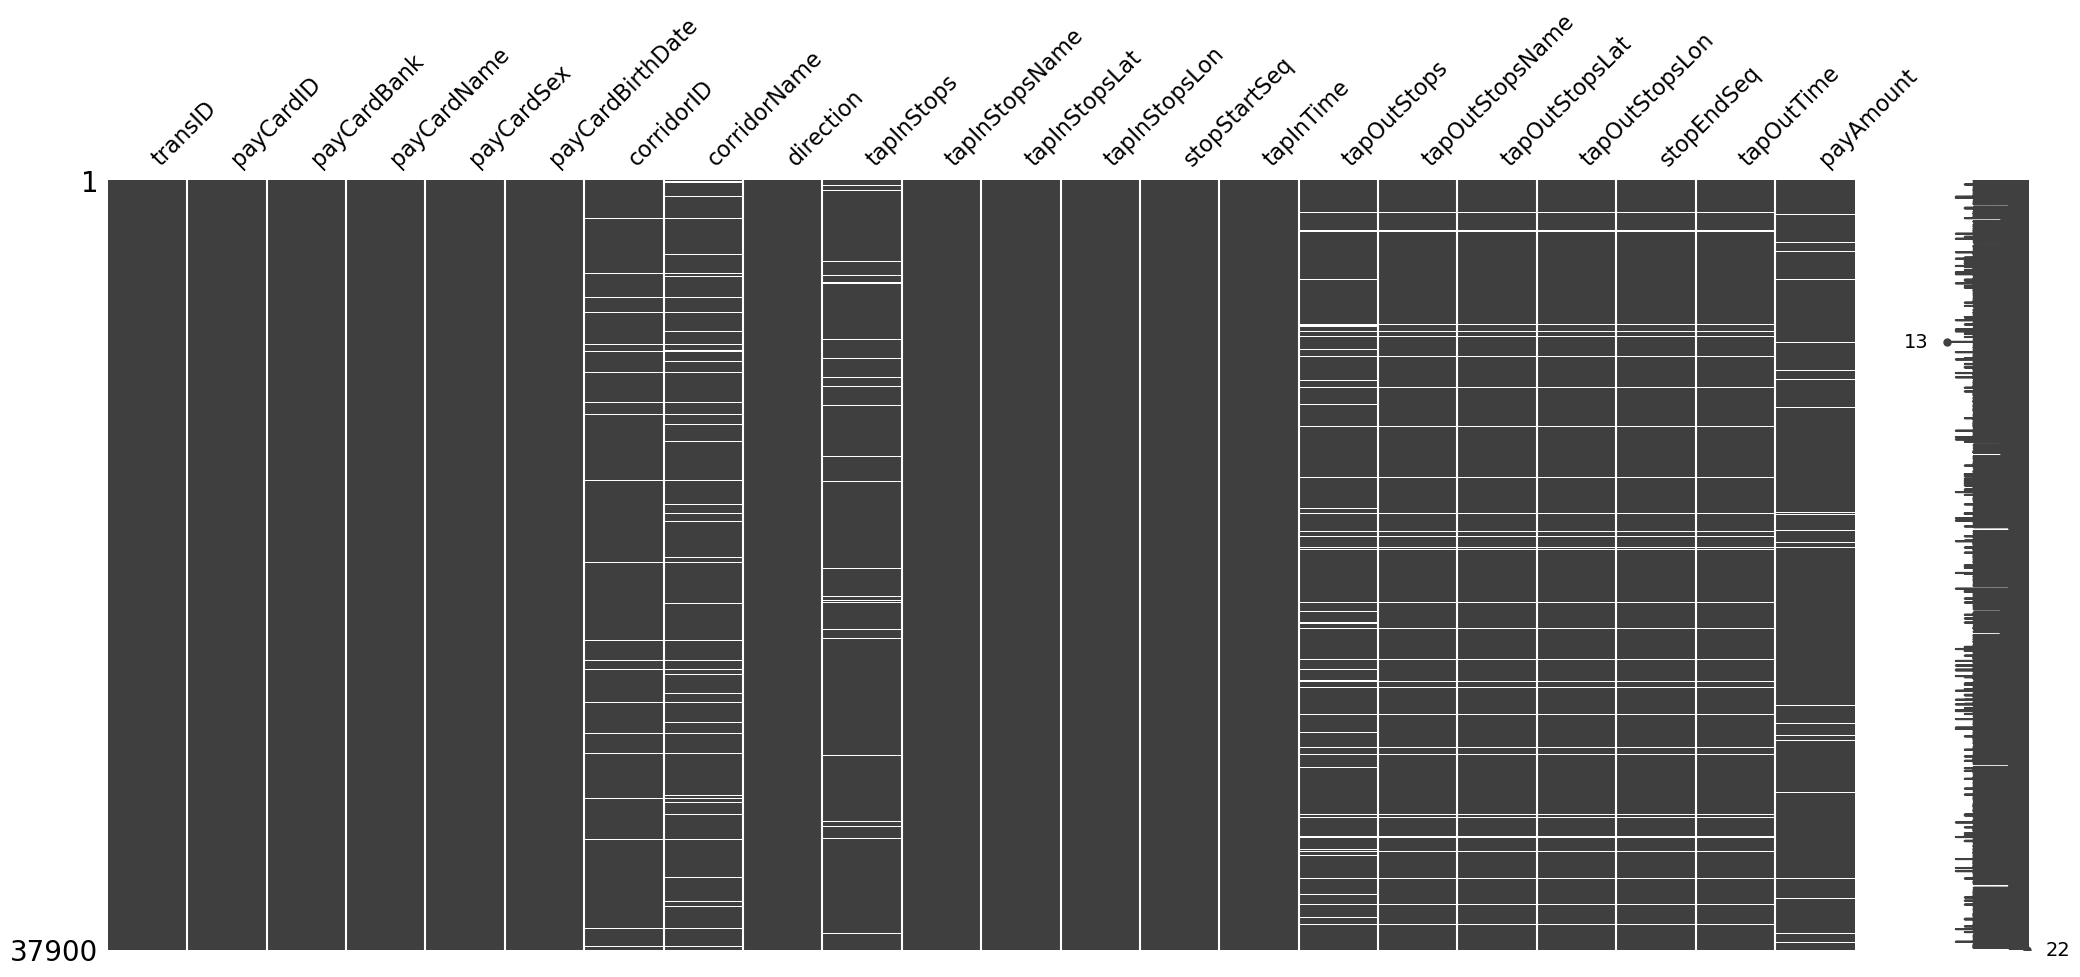

In [13]:
# Visualize missing values using msno matrix
plt.figure(figsize=(10,10))
msno.matrix(data)
plt.show()

### Interpretasi MSNO Matrix

- Terlihat bahwa missing values tidak terjadi secara acak melainkan terdapat pola pada beberapa kolom, terutama pada data terkait informasi tap out. Ini mungkin menunjukkan bahwa dalam beberapa kasus, data untuk perjalanan keluar (tap out) tidak terekam atau tidak tersedia.

- Adanya missing values pada beberapa kolom penting, terutama yang terkait dengan informasi tap out, perlu diperhatikan. Hal ini dapat mempengaruhi analisis yang membutuhkan data lengkap dari perjalanan.

- Perlu dipertimbangkan metode penanganan missing values, seperti imputasi atau penghapusan baris yang memiliki missing values tergantung pada seberapa penting data tersebut untuk analisis selanjutnya.

In [14]:
# # Fungsi untuk mendeteksi outlier
# def detect_outliers(data, column):
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
#     return outliers

# # Misalkan kita ingin memeriksa kolom 'payAmount' untuk outlier
# outliers = detect_outliers(data, 'payAmount')

# print(f"Outliers detected in 'payAmount':")
# print(outliers)

# # Membuat boxplot untuk kolom yang ingin diperiksa
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=data['payAmount'])
# plt.title('Boxplot of payAmount')
# plt.show()

Outliers detected in 'payCardID':
              transID            payCardID payCardBank                  payCardName payCardSex  payCardBirthDate corridorID                         corridorName  direction tapInStops               tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops                  tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
16     XDMP644Z5Y29DB  4556326832434362836  brizzi      Sari Nababan                 F          2004              13         Ciledug - Tendean                   1.00        P00096     JORR                        -6.24          106.75          10            2023-04-03 06:49:48  P00001      Adam Malik                      -6.24           106.75          11.00        2023-04-03 07:47:42 3500.00   
51     IXJW013G5W79VX  4428582927102421723  brizzi      dr. Belinda Handayani, S.E.  M          2002              JAK.02     Kampung Melayu - Duren Sawit        0.00     

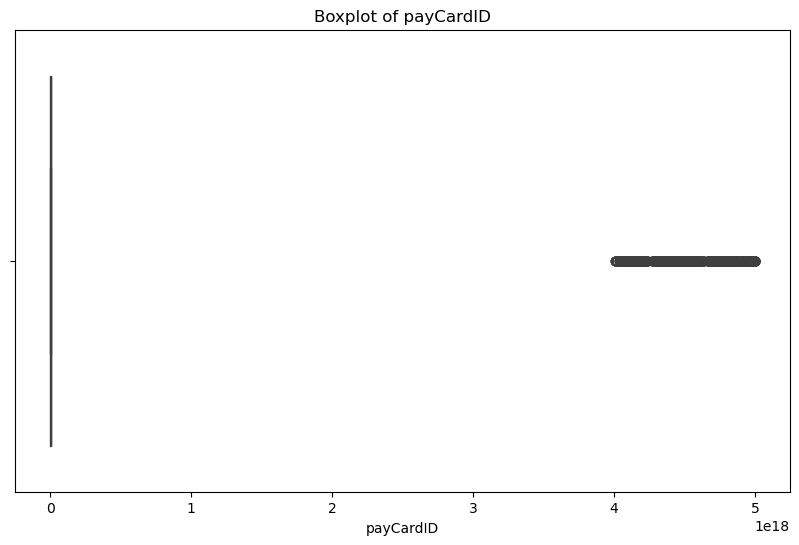

Outliers detected in 'payCardBirthDate':
              transID            payCardID payCardBank                   payCardName payCardSex  payCardBirthDate corridorID                                    corridorName  direction tapInStops                tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops                           tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
80     LFIW578V8Y12XO  2237440645700724     dki         Latika Sirait                 M          1953              10D        Kampung Rambutan - Tanjung Priok               1.00        P00036     Cempaka Putih                -6.17          106.88          9             2023-04-03 06:03:33  P00182      Plumpang Pertamina Arah Utara            -6.13           106.89          13.00        2023-04-03 06:28:37 3500.00   
152    FZGD727V6X43JZ  3507107976417837     dki         Gatra Rahayu                  M          1946              6V  

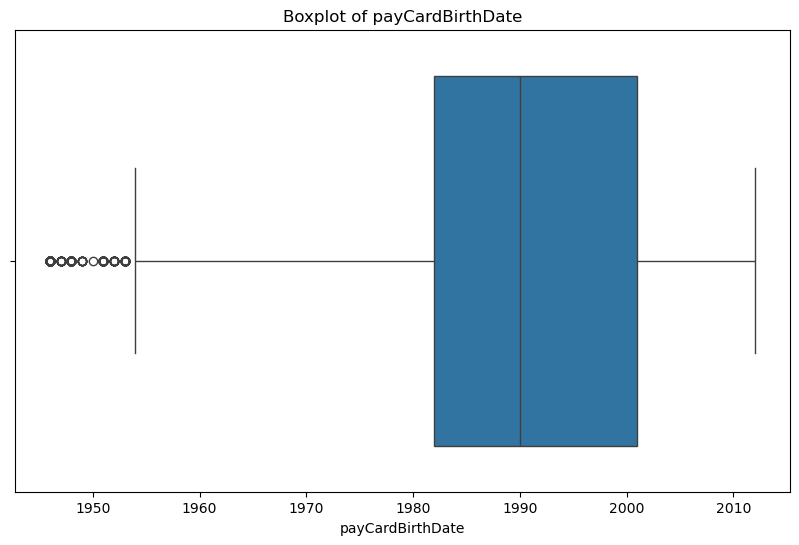

Outliers detected in 'direction':
Empty DataFrame
Columns: [transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate, corridorID, corridorName, direction, tapInStops, tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq, tapInTime, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, payAmount]
Index: []


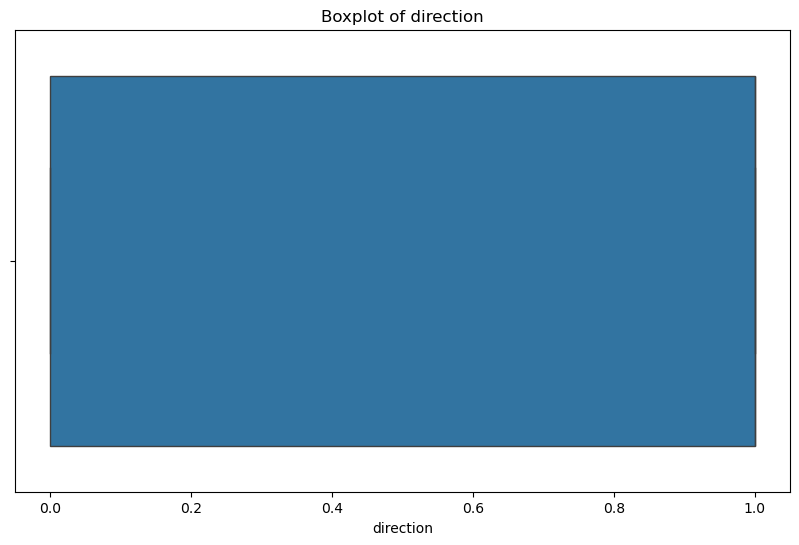

Outliers detected in 'tapInStopsLat':
              transID            payCardID payCardBank                   payCardName payCardSex  payCardBirthDate corridorID                            corridorName  direction tapInStops                     tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops               tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
135    RIGQ092B1C22JU  3521407549788058     dki         Karma Narpati                 F          1994              JAK.47     Pasar Minggu - Ciganjur via KB Ragunan 1.00        B04331P    Sbr. SDN Cipedak 05               -6.35          106.80          46            2023-04-03 05:37:23  B05670P     Tanah Baru Cipedak           -6.36           106.81          50.00        2023-04-03 06:15:31 0.00      
146    JRBW741X3T33KW  4199450082632933049  brizzi      Nadine Andriani, S.IP         M          1974              7C         Cibubur - BKN             

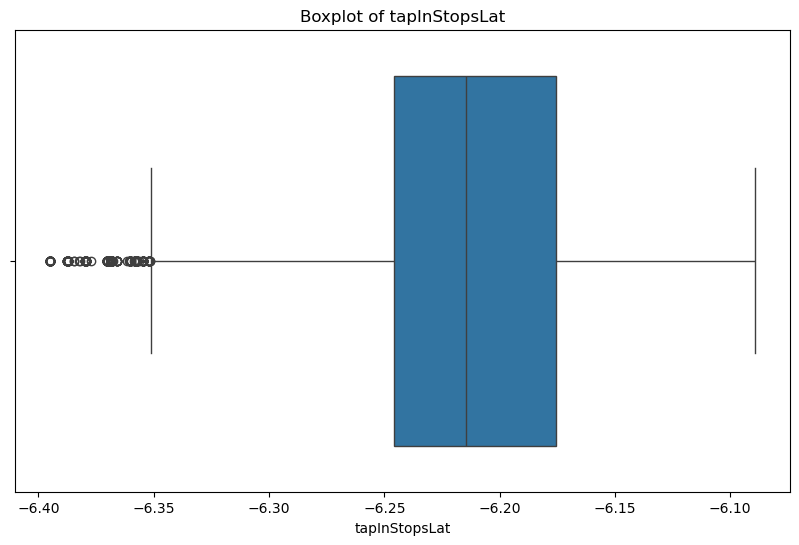

Outliers detected in 'tapInStopsLon':
              transID         payCardID payCardBank                    payCardName payCardSex  payCardBirthDate corridorID                   corridorName  direction tapInStops           tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops      tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
68     XESL868N6A66XN  373945281501952   emoney      Jamal Pudjiastuti, S.I.Kom     F          1981              B21        Bekasi Timur - Cawang         1.00        B02263P    Masjid Amar Maruf 2     -6.26          107.02          7             2023-04-03 05:02:15  B05622P     Taman Margahayu 2   -6.25           107.02          10.00        2023-04-03 05:57:31 3500.00   
117    YTOA058V9U73VN  4709994160903     online      Cut Gabriella Haryanti, S.Sos  M          1974              T21        Palem Semi - Bundaran Senayan 1.00        B00808P    Islamic                 -6.23      

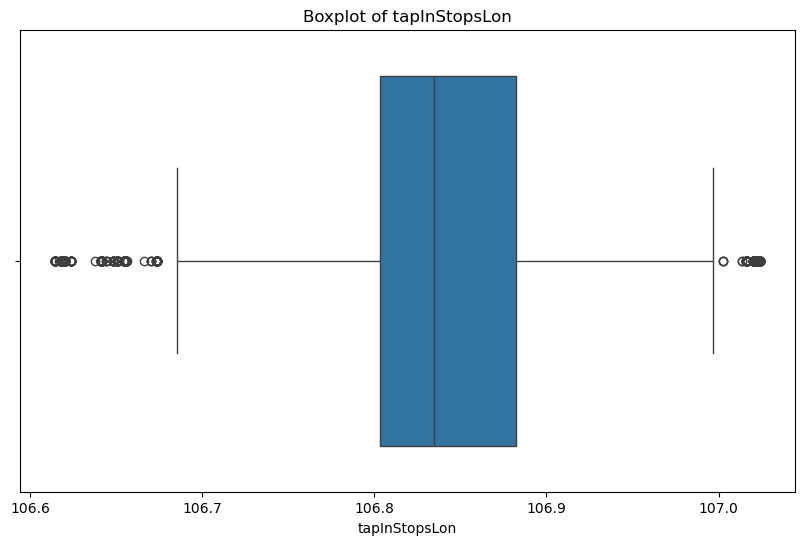

Outliers detected in 'stopStartSeq':
              transID            payCardID payCardBank                   payCardName payCardSex  payCardBirthDate corridorID                                  corridorName  direction tapInStops                             tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops                tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
62     JQIF022K9P74RM  4294484188649274     dki         Gara Sitompul                 F          1999              9D         Pasar Minggu - Tanah Abang                   0.00        B00693P    Grand Pasar Minggu                        -6.29          106.84          45            2023-04-03 06:46:54  B02647P     Pasar Minggu                  -6.28           106.84          47.00        2023-04-03 07:09:23 3500.00   
99     SVRH922T8G79FY  213104805015669      emoney      Sutan Garda Tampubolon, S.Pd  M          1956              JAK.49  

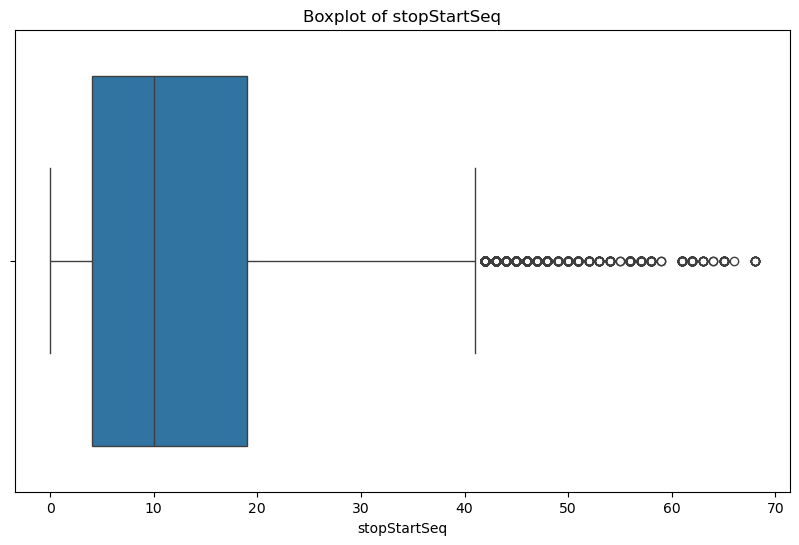

Outliers detected in 'tapOutStopsLat':
              transID            payCardID payCardBank                   payCardName payCardSex  payCardBirthDate corridorID                            corridorName  direction tapInStops                   tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops               tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
135    RIGQ092B1C22JU  3521407549788058     dki         Karma Narpati                 F          1994              JAK.47     Pasar Minggu - Ciganjur via KB Ragunan 1.00        B04331P    Sbr. SDN Cipedak 05             -6.35          106.80          46            2023-04-03 05:37:23  B05670P     Tanah Baru Cipedak           -6.36           106.81          50.00        2023-04-03 06:15:31 0.00      
205    MOGN672F9T55KC  5552327039791635     dki         Hj. Vera Narpati, S.Kom       M          1989              7C         Cibubur - BKN                

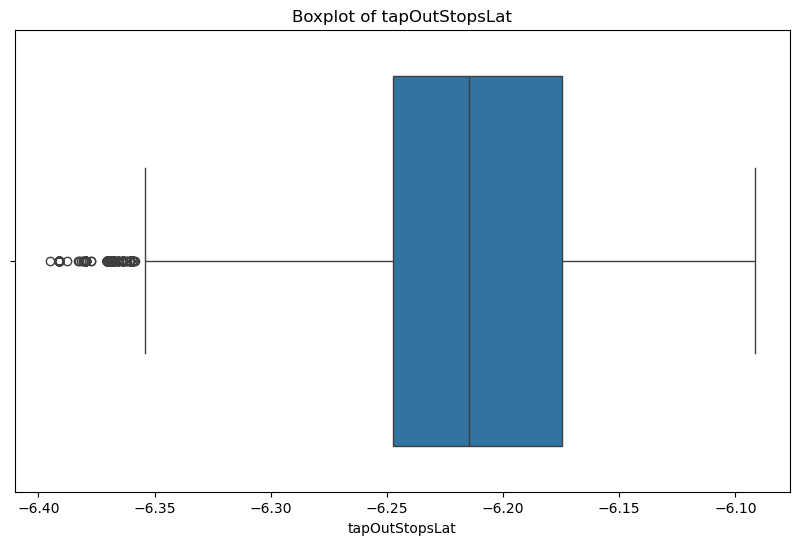

Outliers detected in 'tapOutStopsLon':
              transID            payCardID payCardBank                    payCardName payCardSex  payCardBirthDate corridorID                     corridorName  direction tapInStops              tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops                tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
20     MEFW094B7A84RS  378872365541693      emoney      Aslijan Irawan                 F          2009              T11        Poris Plawad - Bundaran Senayan 1.00        P00206     RS Harapan Kita Arah Utara -6.18          106.80          6             2023-04-03 05:13:08  B05720P     Term. Poris Plawad            -6.17           106.67          24.00        2023-04-03 06:08:59 3500.00   
60     RHUT145C1U25ZY  4290559479079        online      Lutfan Hakim                   M          2011              T21        NaN                             1.00        B005

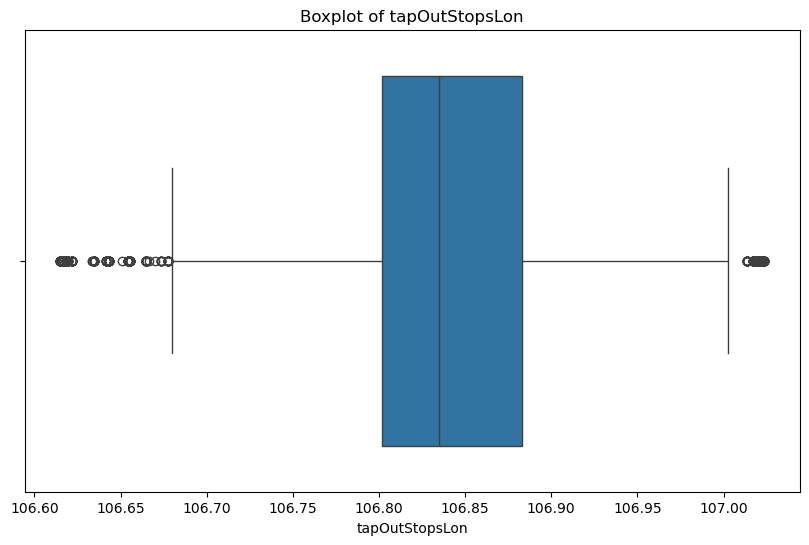

Outliers detected in 'stopEndSeq':
              transID            payCardID payCardBank                  payCardName payCardSex  payCardBirthDate corridorID                                  corridorName  direction tapInStops                             tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops                        tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
215    RXHF248A6A23LD  6571636366239447     dki         Hamzah Zulaika               M          1986              JAK.18     Kalibata - Kuningan                          0.00        B04417P    Sbr. SMA Islam As Syafiiyah 01            -6.22          106.85          34            2023-04-03 06:12:48  B03014P     Puri Imperium                         -6.21           106.83          59.00        2023-04-03 07:08:32 0.00      
235    XGNH505G1W99FE  2295962091596974     dki         Bakidin Putra                F          1996           

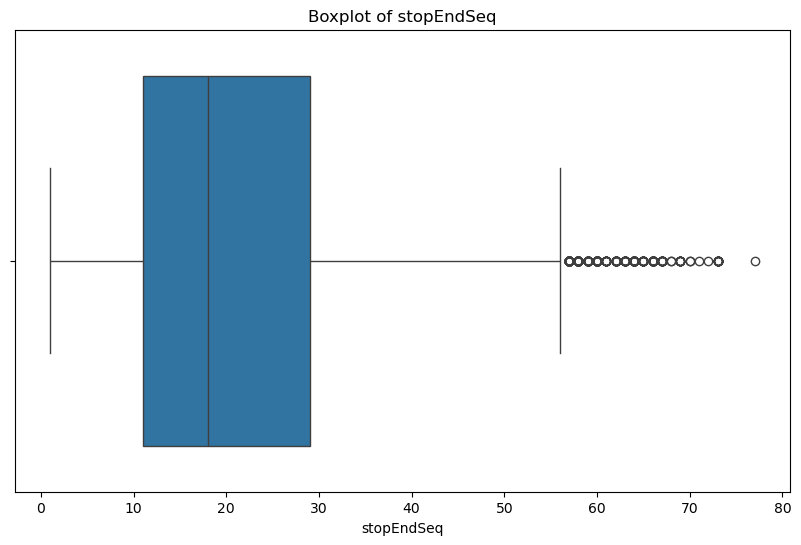

Outliers detected in 'payAmount':
              transID         payCardID payCardBank                    payCardName payCardSex  payCardBirthDate corridorID                   corridorName  direction tapInStops   tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops  tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount
5      DDES630K2F80KC  2251412124634980  dki         Tirta Siregar                  F          1993              1T         Cibubur - Balai Kota          0.00        B00127P    Benhil 3        -6.22          106.82          3             2023-04-03 05:08:01  B00694P     Grand Sahid     -6.21           106.82          6.00         2023-04-03 05:52:25 20000.00  
8      OIHS248V7S72EB  6510013988638519  dki         Cagak Maheswara, S.Sos         F          1992              B14        Bekasi Barat - Kuningan       1.00        B00795P    Imperium        -6.21          106.83          1             20

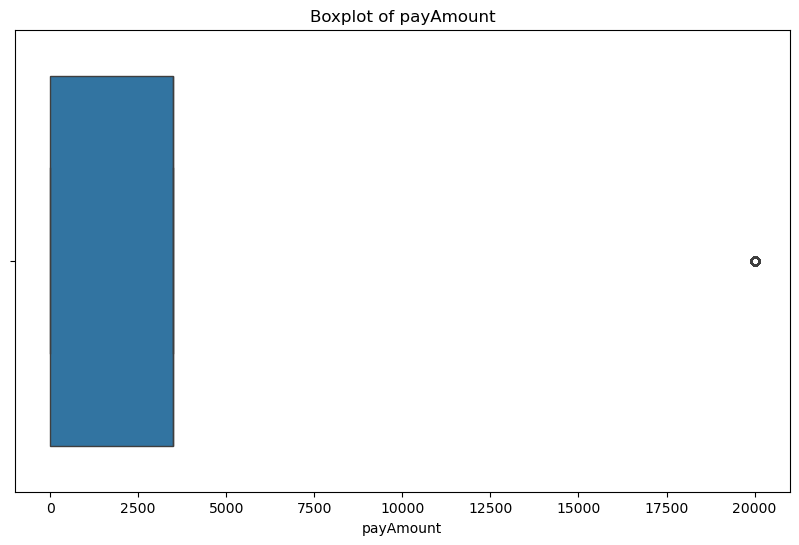

In [15]:

# Fungsi untuk mendeteksi outlier
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numerical_cols = data.select_dtypes(include='number').columns

for col in numerical_cols:
    outliers = detect_outliers(data, col)
    print(f"Outliers detected in '{col}':")
    print(outliers)
    
    # Membuat boxplot untuk kolom tersebut
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Preparing Data

Preparing Data merupakan langkah krusial yang berfokus pada pembersihan dan transformasi data mentah agar siap untuk analisis dan pemodelan. Pada tahap ini, data diseleksi untuk memastikan hanya subset yang relevan yang digunakan, dan pembersihan dilakukan dengan menangani nilai yang hilang, mendeteksi duplikasi, serta mengelola outlier yang dapat mengganggu hasil analisis. Selanjutnya, transformasi data dilakukan melalui scaling atau normalisasi untuk menyelaraskan skala nilai, encoding untuk mengubah data kategorikal menjadi bentuk numerik, serta teknik feature engineering untuk menciptakan fitur baru yang lebih bermakna. Integrasi data dari berbagai sumber juga dilakukan agar menjadi dataset yang konsisten. Selain itu, jika diperlukan, reduksi dimensi diterapkan untuk mengurangi jumlah fitur dan menyederhanakan analisis. Pada akhirnya, data disiapkan dalam format yang sesuai dengan kebutuhan algoritma, memastikan bahwa seluruh langkah ini meningkatkan kualitas data dan mendukung keberhasilan analisis selanjutnya.

# Mengisi missing values corridorID dengan tapInStopsLat dan tapInStopsLon

In [16]:
#mapping utk liat identitas koridor berdasarkan nama dan id koridor
missing_corridor_id_mapping = data.dropna(subset=['corridorID']).drop_duplicates('corridorName')
missing_corridor_id_mapping = missing_corridor_id_mapping.set_index('corridorName')['corridorID']
missing_corridor_id_mapping.reset_index().head()

corridorName corridorID
0  Matraman Baru - Ancol                     5        
1  Stasiun Tebet - Karet via Patra Kuningan  6C       
2  Pantai Maju - Kota                        R1A      
3  Pulo Gebang - Pulo Gadung 2 via PIK       11D      
4  Tanjung Priok - Pluit                     12

In [17]:
#isi corridor id - corridor name function
def fill_corridor_id(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName']):
        return missing_corridor_id_mapping.get(row['corridorName'])
    return row['corridorID']

#apply fill function
data['corridorID'] = data.apply(fill_corridor_id, axis=1)

In [18]:
#mapping utk liat identitas koridor berdasarkan nama dan id koridor
corridor_id_latlong = data.dropna(subset=['corridorID']).drop_duplicates(['tapInStopsLat', 'tapInStopsLon'])
corridor_id_latlong = corridor_id_latlong.set_index(['tapInStopsLat', 'tapInStopsLon'])['corridorID']
corridor_id_latlong.reset_index().head()

tapInStopsLat  tapInStopsLon corridorID
0 -6.18          106.84          5        
1 -6.23          106.83          6C       
2 -6.13          106.81          R1A      
3 -6.20          106.94          11D      
4 -6.15          106.89          12

In [19]:
#isi corridor id - latlong function
def fill_missing_corridor_id(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon']):
        return corridor_id_latlong.get((row['tapInStopsLat'], row['tapInStopsLon']))
    return row['corridorID']

#apply function
data['corridorID'] = data.apply(fill_missing_corridor_id, axis=1)

In [20]:
#mapping corridor name dengan corridor id
corridor_name_mapping = data.dropna(subset=['corridorName']).drop_duplicates('corridorID')
corridor_name_mapping = corridor_name_mapping.set_index('corridorID')['corridorName']
corridor_name_mapping.reset_index().head()

corridorID                              corridorName
0  5          Matraman Baru - Ancol                   
1  6C         Stasiun Tebet - Karet via Patra Kuningan
2  R1A        Pantai Maju - Kota                      
3  11D        Pulo Gebang - Pulo Gadung 2 via PIK     
4  12         Tanjung Priok - Pluit

In [21]:
#isi corridor name dengan corridor id function
def fill_missing_corridor_name(row):
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID']):
        return corridor_name_mapping.get(row['corridorID'])
    return row['corridorName']

#apply function
data['corridorName'] = data.apply(fill_missing_corridor_name, axis=1)

# Mengisi missing values tapInStops

Missing values pada tapInStops diisi memakai informasi dari tapInStopsName, tapInStopsLat, tapInStopsLon

In [22]:
#cek missing values tapinstops
data['tapInStops'].isnull().sum()

1213

In [23]:
#tap in stops pake name 
tap_in_name = data.dropna(subset=['tapInStops']).drop_duplicates(['tapInStopsName'])
tap_in_name = tap_in_name.set_index('tapInStopsName')['tapInStops']
display(tap_in_name)

#fungsi tap in pake name
def fill_missing_tapin_name (row):
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsName']):
        return tap_in_name.get(row['tapInStopsName'])
    return row['tapInStops']

#apply function
data['tapInStops'] = data.apply(fill_missing_tapin_name, axis=1)

tapInStopsName
Pal Putih                      P00142 
Kemenkes 2                     B01963P
Gg. Kunir II                   B00499P
Taman Elok 1                   B05587P
Sunter Boulevard Barat         P00239 
                                ...   
Jatinegara Timur               B01732P
Jln. Pancoran Timur III        B01450P
AKR Tower                      B00018P
Jln. Kartika Meruya Selatan    B01209P
Jln. Gunung Galunggung 1       B01087P
Name: tapInStops, Length: 2569, dtype: object

In [24]:
#tap in stops
tap_in = data.dropna(subset=['tapInStops']).drop_duplicates(['tapInStopsLon', 'tapInStopsLat'])
tap_in = tap_in.set_index(['tapInStopsLon', 'tapInStopsLat'])['tapInStops']
display(tap_in)

#fungsi tap in
def fill_missing_tap_in(row):
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsLon']) and pd.notnull(row['tapInStopsLat']):
        return tap_in.get((row['tapInStopsLon'], row['tapInStopsLat']))
    return row['tapInStops']

#apply function
data['tapInStops'] = data.apply(fill_missing_tap_in, axis = 1)

tapInStopsLon  tapInStopsLat
106.84         -6.18            P00142 
106.83         -6.23            B01963P
106.81         -6.13            B00499P
106.94         -6.20            B05587P
106.89         -6.15            P00239 
                                 ...   
106.87         -6.22            B01732P
106.85         -6.25            B01450P
106.77         -6.19            B00018P
106.74         -6.20            B01209P
               -6.14            B01087P
Name: tapInStops, Length: 2570, dtype: object

#### **Mengisi missing values `tapOutStops`**


Missing values pada `tapOutStops` diisi memakai informasi dari `latitude`, `longitude`, `nama`

In [25]:
#tap out stops pake name 
tap_out_name = data.dropna(subset=['tapOutStops']).drop_duplicates(['tapOutStopsName'])
tap_out_name = tap_out_name.set_index('tapOutStopsName')['tapOutStops']

#fungsi tap out pake name
def fill_missing_tapout_name (row):
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsName']):
        return tap_out_name.get(row['tapOutStopsName'])
    return row['tapOutStops']

#apply function
data['tapOutStops'] = data.apply(fill_missing_tapout_name, axis=1)

In [26]:
#tap out stops
tap_out = data.dropna(subset=['tapOutStops']).drop_duplicates(['tapOutStopsLat', 'tapOutStopsLon'])
tap_out = tap_out.set_index(['tapOutStopsLat', 'tapOutStopsLon'])['tapOutStops']
display(tap_out)

#fungsi tap out
def fill_missing_tap_out (row):
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsLat']) and pd.notnull(row['tapOutStopsLon']):
        return tap_out.get((row['tapOutStopsLat'], row['tapOutStopsLon']))
    return row['tapOutStops']

#apply function
data['tapOutStops'] = data.apply(fill_missing_tap_out, axis=1)

tapOutStopsLat  tapOutStopsLon
-6.20           106.86            P00253 
-6.22           106.82            B03307P
-6.13           106.81            B04962P
-6.18           106.93            B03090P
-6.14           106.81            P00098 
                                   ...   
-6.23           106.91            B00100P
-6.26           106.76            B00688P
-6.12           106.79            B05324P
-6.19           106.77            B02471P
-6.14           106.73            B03207P
Name: tapOutStops, Length: 2230, dtype: object

In [27]:
#menghapus value di masing-masing 'corridorName','corridorID','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime' yang kosong
data.dropna(subset=['corridorName','corridorID','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime'], how='all', inplace=True)

In [28]:
#menghapus value di masing-masing corridor name, dan corridor id yang kosong
data.dropna(subset=['corridorID', 'corridorName'], how='all',inplace=True)

In [29]:
data.dropna(subset=['corridorID',
                  'tapInStops',
                  'tapOutStops',
                  'tapOutTime',
                  'stopEndSeq'], inplace=True)

#### **Mengisi missing values `payAmount` dan menambah kolom baru `transType`**
selanjutnya kita akan mengisi missing values `payAmount` berdasarkan tipe kendaraan.

Tipe kendaraan Transjakarta akan dibagi 3 berdasarkan `payAmount` dan diberi nama `transType` dengan penjelasan berikut:
- Busway = IDR 3500 atau biaya general/flat yang dibayar pengguna Transjakarta
- RoyalTrans = IDR 20000, hanya lewat untuk beberapa rute 
- Mikrotrans = IDR 0

In [30]:
#buat kolom baru untuk tipe kendaraan nya
def tipe_trans (payAmount) :
    if payAmount == 3500:
        return 'Busway'
    elif payAmount == 20000:
        return 'RoyalTrans'
    else:
        return 'Mikrotrans'
    
data['transType'] = data['payAmount'].apply(tipe_trans)

data

transID            payCardID payCardBank             payCardName payCardSex  payCardBirthDate corridorID                              corridorName  direction tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq            tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount   transType
0      EIIW227B8L34VB  180062659848800      emoney      Bajragin Usada          M          2008              5          Matraman Baru - Ancol                    1.00        P00142     Pal Putih              -6.18          106.84          7             2023-04-03 05:21:44  P00253      Tegalan               -6.20           106.86          12.00        2023-04-03 06:00:53 3500.00     Busway    
1      LGXO740D2N47GZ  4885331907664776     dki         Gandi Widodo            F          1997              6C         Stasiun Tebet - Karet via Patra Kuningan 0.00        B01963P    Kemenkes 2             -6.23          106.83          13            2023-04-03 05:42:44  B03307P     Sampoerna Strategic   -6.22           106.82          21.00        2023-04-03 06:40:01 3500.00     Busway    
2      DJWR385V2U57TO  4996225095064169     dki         Emong Wastuti           F          1992              R1A        Pantai Maju - Kota                       0.00        B00499P    Gg. Kunir II           -6.13          106.81          38            2023-04-03 05:59:06  B04962P     Simpang Kunir Kemukus -6.13           106.81          39.00        2023-04-03 06:50:55 3500.00     Busway    
3      JTUZ800U7C86EH  639099174703         flazz       Surya Wacana            F          1978              11D        Pulo Gebang - Pulo Gadung 2 via PIK      0.00        B05587P    Taman Elok 1           -6.20          106.94          23            2023-04-03 05:44:51  B03090P     Raya Penggilingan     -6.18           106.93          29.00        2023-04-03 06:28:16 3500.00     Busway    
4      VMLO535V7F95NJ  570928206772         flazz       Embuh Mardhiyah         M          1982              12         Tanjung Priok - Pluit                    0.00        P00239     Sunter Boulevard Barat -6.15          106.89          5             2023-04-03 06:17:35  P00098      Kali Besar Barat      -6.14           106.81          15.00        2023-04-03 06:57:03 3500.00     Busway    
...               ...           ...           ...                   ...        ..           ...              ..                           ...                     ...           ...                        ...   ...             ...         ..                             ...     ...                   ...        ...              ...            ...                        ...     ...        ...    
37895  ZWEC949B8Q87QG  4685818286724028395  brizzi      Kamila Mahendra         F          2004              6B         Ragunan - MH Thamrin via Semanggi        1.00        P00261     Tosari                 -6.20          106.82          2             2023-04-21 18:18:37  P00228      SMK 57                -6.29           106.82          13.00        2023-04-21 19:55:49 3500.00     Busway    
37896  YHHK837P6Y95GN  6502902290603767     dki         Titi Siregar            M          1974              9N         Pinang Ranti - Pramuka                   1.00        P00064     Garuda Taman Mini      -6.29          106.88          1             2023-04-18 21:52:31  P00179      Pinang Ranti          -6.29           106.89          2.00         2023-04-18 22:28:22 3500.00     Busway    
37897  YXPP627N4G95HO  213159426675861      emoney      drg. Zahra Nashiruddin  F          1976              1T         Cibubur - Balai Kota                     1.00        B02873P    Plaza Sentral          -6.22          106.82          12            2023-04-04 10:29:47  B00226P     Buperta Cibubur       -6.37           106.90          14.00        2023-04-04 13:27:25 20000.00    RoyalTrans
37898  RGVK175U2U98UV  377840859133591      emoney      Ana Agus

In [31]:
#Mengecek penumpang yang memakai Royal Trans (bayar IDR 20000) ada di koridor mana saja
data.loc[data['payAmount'] == 20000.0]['corridorName'].unique()

array(['Cibubur - Balai Kota', 'Bekasi Barat - Kuningan',
       'Palem Semi - Bundaran Senayan', 'Cinere - Bundaran Senayan',
       'Bintaro - Fatmawati', 'Senen - Blok M',
       'Stasiun Tebet - Karet via Patra Kuningan', 'Cibubur - BKN',
       'Bekasi Barat - Blok M', 'Cinere - Kuningan',
       'Cibubur Junction - Blok M', 'Cibubur - Kuningan',
       'BSD Serpong - Fatmawati', 'Tanah Abang - Blok M'], dtype=object)

In [32]:
corridor_royal = ['Cibubur - Balai Kota', 'Bekasi Barat - Kuningan',
       'Palem Semi - Bundaran Senayan', 'Cinere - Bundaran Senayan',
       'Bintaro - Fatmawati', 'Senen - Blok M',
       'Stasiun Tebet - Karet via Patra Kuningan', 'Cibubur - BKN',
       'Bekasi Barat - Blok M', 'Cinere - Kuningan',
       'Cibubur Junction - Blok M', 'Cibubur - Kuningan',
       'BSD Serpong - Fatmawati', 'Tanah Abang - Blok M']

#fungsi fill pay amount
def fill_pay_amount(row):
    if row['corridorName'] in corridor_royal and pd.isna(row['payAmount']):
        return 20000
    elif pd.isna(row['payAmount']):
        return 3500
    else:
        return row['payAmount']
    
#apply function
data['payAmount'] = data.apply(fill_pay_amount, axis=1)

In [33]:
data.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
transType           0
dtype: int64

In [34]:
#melihat data yang duplikat di koridor name dan koridor id

# Pengelompokan
corridor_grouped = data.groupby('corridorName')['corridorID'].nunique()

# Filter kelompok dengan dua nilai koridor ID
corridors_with_two_ids = corridor_grouped[corridor_grouped > 1]

# Tampilkan hasil
print(corridors_with_two_ids)

corridorName
Blok M - Kota                          2
Kalideres - Bundaran HI via Veteran    2
Matraman Baru - Ancol                  2
Pinang Ranti - Pluit                   2
Pulo Gadung - Monas                    2
Name: corridorID, dtype: int64


dataset Transjakarta tidak memiliki data duplikat, namun ada data di unique count `corridorId` dan `corridorName` tidak sama, seharusnya 1 `corridorId` memiliki 1 `corridorName`

Selanjutnya dilakukan pengecekan apakah `corridorId` yang beda memiliki `corridorName` yang sama atau sebaliknya


In [35]:
# Mencari koridor yang memiliki dua atau lebih corridorID
corridors_with_two_ids = data.groupby('corridorName')['corridorID'].nunique()
corridors_with_two_ids = corridors_with_two_ids[corridors_with_two_ids > 1]

# Membuat DataFrame dari koridor yang memiliki dua atau lebih corridorID
corridors_with_two_ids_df = pd.DataFrame({
    'corridorName': corridors_with_two_ids.index,
    'uniqueCorridorIDCount': corridors_with_two_ids.values
})

# Mendapatkan daftar unique corridorID untuk setiap corridorName yang memiliki lebih dari satu corridorID
corridor_ids = []
for corridor_name in corridors_with_two_ids_df['corridorName']:
    unique_ids = data[data['corridorName'] == corridor_name]['corridorID'].unique()
    corridor_ids.append(list(unique_ids))

corridors_with_two_ids_df['corridorID'] = corridor_ids

# Menampilkan hasil
corridors_with_two_ids_df


corridorName  uniqueCorridorIDCount corridorID
0  Blok M - Kota                        2                      [M1, 1]  
1  Kalideres - Bundaran HI via Veteran  2                      [M3, 3]  
2  Matraman Baru - Ancol                2                      [5, M5]  
3  Pinang Ranti - Pluit                 2                      [M9, 9]  
4  Pulo Gadung - Monas                  2                      [2, M2]

Ada dua corridorID untuk satu nama koridor. Disebabkan jam operasional nya di bagi dua, pagi dan malam sehingga untuk jam malam akan ditambhakan **(M)**

In [36]:
## menyamakan data id corridor dengan corridor name dengan data terbanyak
data.loc[data['corridorName'] == 'Blok M - Kota', 'corridorID'] = '1'
data.loc[data['corridorName'] == 'Kalideres - Bundaran HI via Veteran', 'corridorID'] = 'M3'
data.loc[data['corridorName'] == 'Matraman Baru - Ancol', 'corridorID'] = '5'
data.loc[data['corridorName'] == 'Pinang Ranti - Pluit', 'corridorID'] = 'M9'
data.loc[data['corridorName'] == 'Pulo Gadung - Monas', 'corridorID'] = '2'

# Mengubah tipe data dan menambah kolom baru

In [37]:
# Menambah kolom duration 

data["duration"] = data.apply(lambda x:(x['tapInTime'],x['tapOutTime']),axis=1) 
#hour
data['tapInTime'] = pd.to_datetime(data['tapInTime'])
data['tapOutTime'] = pd.to_datetime(data['tapOutTime'])

data["tapInHour"] = data["tapInTime"].dt.hour
data["tapOutHour"] = data["tapOutTime"].dt.hour

#day
data['tapDay'] = data['tapInTime'].dt.dayofweek
# mengisi value untuk kolom tapDay
data['tapDay'] = data['tapDay'].replace(
    {0 : 'Monday', 
     1 : 'Tuesday', 
     2 : 'Wednesday', 
     3 : 'Thursday', 
     4 : 'Friday', 
     5 : 'Saturday', 
     6 : 'Sunday'})

In [38]:
# mendefinisikan sebuah fungsi untuk menghitung durasi perjalanan

data = data.reset_index()

datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = dt.datetime.strptime(b, datetimeFormat)- dt.datetime.strptime(a, datetimeFormat)
    return(round(diff.seconds/3600.0))

In [39]:
#cek anomali di trip duration
display(data['duration'].value_counts())

duration
(2023-04-13 18:22:20, 2023-04-13 19:38:24)    2
(2023-04-03 05:21:44, 2023-04-03 06:00:53)    1
(2023-04-20 08:00:05, 2023-04-20 09:51:03)    1
(2023-04-20 08:35:31, 2023-04-20 08:55:54)    1
(2023-04-20 08:50:02, 2023-04-20 09:45:15)    1
                                             ..
(2023-04-03 19:18:39, 2023-04-03 20:33:28)    1
(2023-04-03 17:26:23, 2023-04-03 18:41:41)    1
(2023-04-03 21:15:35, 2023-04-03 22:27:18)    1
(2023-04-03 21:31:26, 2023-04-03 22:45:47)    1
(2023-04-12 21:08:12, 2023-04-12 21:34:53)    1
Name: count, Length: 36473, dtype: int64

In [40]:
#buat kolom age
data['age'] = 2023 - data['payCardBirthDate']

#buat kolom age group
def age_group(age):
    if age < 15:
        return 'Anak - Anak'
    elif 16 <= age <= 19:
        return 'Remaja'
    elif 20 <= age <= 39:
        return 'Dewasa Awal'
    elif 40 <= age <= 59:
        return 'Dewasa Akhir'
    else:
        return 'Lansia'

data['ageGroup'] = data['age'].apply(age_group)

In [41]:
# Menambah kolom tanggal
data["date"]=data["tapOutTime"].dt.day

In [42]:
# mengidentifikasi weekend dan weekdays
data['day_group']=np.where(data['tapDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])==True,'Weekdays','Weekend')

In [43]:
data

index         transID            payCardID payCardBank             payCardName payCardSex  payCardBirthDate corridorID                              corridorName  direction tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq           tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq          tapOutTime  payAmount   transType                                    duration  tapInHour  tapOutHour     tapDay  age      ageGroup  \
0      0      EIIW227B8L34VB  180062659848800      emoney      Bajragin Usada          M          2008              5          Matraman Baru - Ancol                    1.00        P00142     Pal Putih              -6.18          106.84          7            2023-04-03 05:21:44  P00253      Tegalan               -6.20           106.86          12.00       2023-04-03 06:00:53 3500.00     Busway      (2023-04-03 05:21:44, 2023-04-03 06:00:53)  5          6           Monday     15   Lansia         
1      1      LGXO740D2N47GZ  4885331907664776     dki         Gandi Widodo            F          1997              6C         Stasiun Tebet - Karet via Patra Kuningan 0.00        B01963P    Kemenkes 2             -6.23          106.83          13           2023-04-03 05:42:44  B03307P     Sampoerna Strategic   -6.22           106.82          21.00       2023-04-03 06:40:01 3500.00     Busway      (2023-04-03 05:42:44, 2023-04-03 06:40:01)  5          6           Monday     26   Dewasa Awal    
2      2      DJWR385V2U57TO  4996225095064169     dki         Emong Wastuti           F          1992              R1A        Pantai Maju - Kota                       0.00        B00499P    Gg. Kunir II           -6.13          106.81          38           2023-04-03 05:59:06  B04962P     Simpang Kunir Kemukus -6.13           106.81          39.00       2023-04-03 06:50:55 3500.00     Busway      (2023-04-03 05:59:06, 2023-04-03 06:50:55)  5          6           Monday     31   Dewasa Awal    
3      3      JTUZ800U7C86EH  639099174703         flazz       Surya Wacana            F          1978              11D        Pulo Gebang - Pulo Gadung 2 via PIK      0.00        B05587P    Taman Elok 1           -6.20          106.94          23           2023-04-03 05:44:51  B03090P     Raya Penggilingan     -6.18           106.93          29.00       2023-04-03 06:28:16 3500.00     Busway      (2023-04-03 05:44:51, 2023-04-03 06:28:16)  5          6           Monday     45   Dewasa Akhir   
4      4      VMLO535V7F95NJ  570928206772         flazz       Embuh Mardhiyah         M          1982              12         Tanjung Priok - Pluit                    0.00        P00239     Sunter Boulevard Barat -6.15          106.89          5            2023-04-03 06:17:35  P00098      Kali Besar Barat      -6.14           106.81          15.00       2023-04-03 06:57:03 3500.00     Busway      (2023-04-03 06:17:35, 2023-04-03 06:57:03)  6          6           Monday     41   Dewasa Akhir   
...   ..                 ...           ...           ...                   ...        ..           ...              ..                           ...                     ...           ...                        ...   ...             ...         ..                            ...     ...                   ...        ...              ...            ...                       ...     ...        ...                                             ... ..         ..              ...     ..            ...   
36469  37895  ZWEC949B8Q87QG  4685818286724028395  brizzi      Kamila Mahendra         F          2004              6B         Ragunan - MH Thamrin via Semanggi        1.00        P00261     Tosari                 -6.20          106.82          2            2023-04-21 18:18:37  P00228      SMK 57                -6.29           106.82          13.00       2023-04-21 19:55:49 3500.00     Busway      (2023-04-21 18:18:37, 2023-04-21 19:55:49)  18         19          Friday     19   Remaja         
36470  

### **Hasil dari Data Cleaning**

1. Mengisi *missing values* yang dapat diisi
2. Menghilangkan data yang tidak dapat diisi
3. Menambah beberapa kolom baru:

| Kolom             | Deskripsi                                      |
|-------------------|------------------------------------------------|
| `transType`       | Tipe Transjakarta yang digunakan (diambil berdasarkan 3 values `payAmount`)             |
| `Duration`    | Durasi lama nya pengguna memakai Transjakarta, dibagi menjadi dibawah 1 jam, 1, 2, dan 3 jam |
| `tapInHour`       | Jam tap in pengguna (diambil dari `tapInTime`) |
| `tapOutHour`      | Jam tap out pengguna (diambir dari `tapOutTime`) |
| `tapDay`          | Hari pengguna memakai Transjakarta |
| `age`             | Umur pengguna dalam numerik |
| `ageGroup`        | Grup umur pengguna yang di klasifikasi jadi 5 kelompok: anak-anak, remaja, dewasa awal, dewasa akhir, dan lansia |
| `date`          | Tanggal pengguna memakai Transjakarta |
| `day_group`       | Grup Hari Transjakarta yang dibagi menjadi 2: Weekend dan Weekdays |

# Analysis Data

In [44]:
data

index         transID            payCardID payCardBank             payCardName payCardSex  payCardBirthDate corridorID                              corridorName  direction tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq           tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq          tapOutTime  payAmount   transType                                    duration  tapInHour  tapOutHour     tapDay  age      ageGroup  \
0      0      EIIW227B8L34VB  180062659848800      emoney      Bajragin Usada          M          2008              5          Matraman Baru - Ancol                    1.00        P00142     Pal Putih              -6.18          106.84          7            2023-04-03 05:21:44  P00253      Tegalan               -6.20           106.86          12.00       2023-04-03 06:00:53 3500.00     Busway      (2023-04-03 05:21:44, 2023-04-03 06:00:53)  5          6           Monday     15   Lansia         
1      1      LGXO740D2N47GZ  4885331907664776     dki         Gandi Widodo            F          1997              6C         Stasiun Tebet - Karet via Patra Kuningan 0.00        B01963P    Kemenkes 2             -6.23          106.83          13           2023-04-03 05:42:44  B03307P     Sampoerna Strategic   -6.22           106.82          21.00       2023-04-03 06:40:01 3500.00     Busway      (2023-04-03 05:42:44, 2023-04-03 06:40:01)  5          6           Monday     26   Dewasa Awal    
2      2      DJWR385V2U57TO  4996225095064169     dki         Emong Wastuti           F          1992              R1A        Pantai Maju - Kota                       0.00        B00499P    Gg. Kunir II           -6.13          106.81          38           2023-04-03 05:59:06  B04962P     Simpang Kunir Kemukus -6.13           106.81          39.00       2023-04-03 06:50:55 3500.00     Busway      (2023-04-03 05:59:06, 2023-04-03 06:50:55)  5          6           Monday     31   Dewasa Awal    
3      3      JTUZ800U7C86EH  639099174703         flazz       Surya Wacana            F          1978              11D        Pulo Gebang - Pulo Gadung 2 via PIK      0.00        B05587P    Taman Elok 1           -6.20          106.94          23           2023-04-03 05:44:51  B03090P     Raya Penggilingan     -6.18           106.93          29.00       2023-04-03 06:28:16 3500.00     Busway      (2023-04-03 05:44:51, 2023-04-03 06:28:16)  5          6           Monday     45   Dewasa Akhir   
4      4      VMLO535V7F95NJ  570928206772         flazz       Embuh Mardhiyah         M          1982              12         Tanjung Priok - Pluit                    0.00        P00239     Sunter Boulevard Barat -6.15          106.89          5            2023-04-03 06:17:35  P00098      Kali Besar Barat      -6.14           106.81          15.00       2023-04-03 06:57:03 3500.00     Busway      (2023-04-03 06:17:35, 2023-04-03 06:57:03)  6          6           Monday     41   Dewasa Akhir   
...   ..                 ...           ...           ...                   ...        ..           ...              ..                           ...                     ...           ...                        ...   ...             ...         ..                            ...     ...                   ...        ...              ...            ...                       ...     ...        ...                                             ... ..         ..              ...     ..            ...   
36469  37895  ZWEC949B8Q87QG  4685818286724028395  brizzi      Kamila Mahendra         F          2004              6B         Ragunan - MH Thamrin via Semanggi        1.00        P00261     Tosari                 -6.20          106.82          2            2023-04-21 18:18:37  P00228      SMK 57                -6.29           106.82          13.00       2023-04-21 19:55:49 3500.00     Busway      (2023-04-21 18:18:37, 2023-04-21 19:55:49)  18         19          Friday     19   Remaja         
36470  

In [45]:
data['tapInHour'] = data['tapInTime'].dt.hour
data['tapOutHour'] = data['tapOutTime'].dt.hour
data['tapOutHour'] = data['tapOutHour'].replace(0, 24)
data['tripDuration'] = data['tapOutHour'] - data['tapInHour']
data

index         transID            payCardID payCardBank             payCardName payCardSex  payCardBirthDate corridorID                              corridorName  direction tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq           tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq          tapOutTime  payAmount   transType                                    duration  tapInHour  tapOutHour     tapDay  age      ageGroup  \
0      0      EIIW227B8L34VB  180062659848800      emoney      Bajragin Usada          M          2008              5          Matraman Baru - Ancol                    1.00        P00142     Pal Putih              -6.18          106.84          7            2023-04-03 05:21:44  P00253      Tegalan               -6.20           106.86          12.00       2023-04-03 06:00:53 3500.00     Busway      (2023-04-03 05:21:44, 2023-04-03 06:00:53)  5          6           Monday     15   Lansia         
1      1      LGXO740D2N47GZ  4885331907664776     dki         Gandi Widodo            F          1997              6C         Stasiun Tebet - Karet via Patra Kuningan 0.00        B01963P    Kemenkes 2             -6.23          106.83          13           2023-04-03 05:42:44  B03307P     Sampoerna Strategic   -6.22           106.82          21.00       2023-04-03 06:40:01 3500.00     Busway      (2023-04-03 05:42:44, 2023-04-03 06:40:01)  5          6           Monday     26   Dewasa Awal    
2      2      DJWR385V2U57TO  4996225095064169     dki         Emong Wastuti           F          1992              R1A        Pantai Maju - Kota                       0.00        B00499P    Gg. Kunir II           -6.13          106.81          38           2023-04-03 05:59:06  B04962P     Simpang Kunir Kemukus -6.13           106.81          39.00       2023-04-03 06:50:55 3500.00     Busway      (2023-04-03 05:59:06, 2023-04-03 06:50:55)  5          6           Monday     31   Dewasa Awal    
3      3      JTUZ800U7C86EH  639099174703         flazz       Surya Wacana            F          1978              11D        Pulo Gebang - Pulo Gadung 2 via PIK      0.00        B05587P    Taman Elok 1           -6.20          106.94          23           2023-04-03 05:44:51  B03090P     Raya Penggilingan     -6.18           106.93          29.00       2023-04-03 06:28:16 3500.00     Busway      (2023-04-03 05:44:51, 2023-04-03 06:28:16)  5          6           Monday     45   Dewasa Akhir   
4      4      VMLO535V7F95NJ  570928206772         flazz       Embuh Mardhiyah         M          1982              12         Tanjung Priok - Pluit                    0.00        P00239     Sunter Boulevard Barat -6.15          106.89          5            2023-04-03 06:17:35  P00098      Kali Besar Barat      -6.14           106.81          15.00       2023-04-03 06:57:03 3500.00     Busway      (2023-04-03 06:17:35, 2023-04-03 06:57:03)  6          6           Monday     41   Dewasa Akhir   
...   ..                 ...           ...           ...                   ...        ..           ...              ..                           ...                     ...           ...                        ...   ...             ...         ..                            ...     ...                   ...        ...              ...            ...                       ...     ...        ...                                             ... ..         ..              ...     ..            ...   
36469  37895  ZWEC949B8Q87QG  4685818286724028395  brizzi      Kamila Mahendra         F          2004              6B         Ragunan - MH Thamrin via Semanggi        1.00        P00261     Tosari                 -6.20          106.82          2            2023-04-21 18:18:37  P00228      SMK 57                -6.29           106.82          13.00       2023-04-21 19:55:49 3500.00     Busway      (2023-04-21 18:18:37, 2023-04-21 19:55:49)  18         19          Friday     19   Remaja         
36470  

| Kolom             | Deskripsi                                      |
|-------------------|------------------------------------------------|
| `Menambah Kolom 'tapInHour'`       | data['tapInHour'] = data['tapInTime'].dt.hour menambahkan kolom baru bernama 'tapInHour' yang mengekstrak informasi jam dari kolom 'tapInTime'. Jadi, setiap nilai di kolom 'tapInHour' akan menunjukkan jam pada saat penumpang melakukan tap-in.            |
| `Menambah Kolom 'tapOutHour'`    | data['tapOutHour'] = data['tapOutTime'].dt.hour menambahkan kolom baru bernama 'tapOutHour' yang mengekstrak informasi jam dari kolom 'tapOutTime'. Jadi, setiap nilai di kolom 'tapOutHour' akan menunjukkan jam pada saat penumpang melakukan tap-out.|
| `Mengganti Nilai 0 di Kolom 'tapOutHour'`       | data['tapOutHour'] = data['tapOutHour'].replace(0, 24) menggantikan semua nilai 0 di kolom 'tapOutHour' dengan nilai 24. Hal ini bisa dilakukan jika jam 0 dianggap sebagai jam 24 (mungkin karena data mencatat tap-out yang terjadi tepat tengah malam, dan dianggap sebagai akhir hari). |
| `Menghitung Durasi Perjalanan`      | Jam tap out pengguna (diambir dari `tapOutTime`) |
| `tapDay`          | data['tripDuration'] = data['tapOutHour'] - data['tapInHour'] menghitung durasi perjalanan (trip duration) dengan mengurangkan 'tapInHour' dari 'tapOutHour'. Kolom baru ini ('tripDuration') akan berisi durasi perjalanan dalam jam. |

`Tujuan` Kode: Kode ini bertujuan untuk mengekstrak informasi jam dari data waktu tap-in dan tap-out, dan kemudian menghitung berapa lama waktu perjalanan (dalam jam) antara waktu penumpang melakukan tap-in dan tap-out.



In [46]:
data.tripDuration.unique()

array([1, 0, 2, 3])

In [47]:
data['tripDuration'].describe()

count   36474.00
mean    1.20    
std     0.62    
min     0.00    
25%     1.00    
50%     1.00    
75%     2.00    
max     3.00    
Name: tripDuration, dtype: float64

In [48]:
data.columns

Index(['index', 'transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'corridorID', 'corridorName', 'direction', 'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount', 'transType', 'duration', 'tapInHour', 'tapOutHour', 'tapDay', 'age', 'ageGroup', 'date', 'day_group', 'tripDuration'], dtype='object')

In [49]:
sorted_data = data.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration']).size().reset_index(name='trip').sort_values(by=['tripDuration', 'trip'], ascending=False, ignore_index=True)


In [50]:
data.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration'])['transID'].count().reset_index(name='trip').sort_values(by='trip', ascending=False, ignore_index=True)

tapInStopsName    tapOutStopsName  tripDuration  trip
0     Rusun Kapuk Muara       Penjaringan        1             77  
1     Penjaringan             Rusun Kapuk Muara  1             74  
2     Garuda Taman Mini       BKN                1             60  
3     Garuda Taman Mini       Pinang Ranti       1             52  
4     Cibubur Junction        BKN                1             51  
...                ...        ...               ..             ..  
7052  Kementerian Pariwisata  St. Gambir 2       1             1   
7053  Rusun Marunda 1         Bidara 1           1             1   
7054  Rusun Marunda 1         STIP 2             1             1   
7055  Rusun Marunda 1         Sbr. Gg. Elektro   1             1   
7056  Yos Sudarso Kodamar     Pemuda Pramuka     1             1   

[7057 rows x 4 columns]

 mengidentifikasi rute dan durasi perjalanan yang paling sering digunakan oleh penumpang Transjakarta. Dengan mengurutkan data berdasarkan jumlah penumpang, kita dapat dengan mudah melihat rute mana yang paling populer dan memiliki durasi perjalanan tertentu, yang dapat berguna dalam analisis efisiensi rute dan optimalisasi operasional.

In [51]:
transcount = pd.DataFrame(data[['tapInStopsName', 'tapOutStopsName']].groupby(['tapInStopsName', 'tapOutStopsName']).size().reset_index(name='TransactionCount').sort_values(by='TransactionCount', ascending=False, ignore_index=True))
transcount

tapInStopsName          tapOutStopsName  TransactionCount
0     Rusun Kapuk Muara        Penjaringan              125             
1     Penjaringan              Rusun Kapuk Muara        117             
2     Garuda Taman Mini        BKN                      100             
3     Cibubur Junction         BKN                      88              
4     Garuda Taman Mini        Pinang Ranti             85              
...                 ...                 ...             ..              
4339  MI Imadun Najah Rorotan  Rusun Rorotan            1               
4340  MTsN 3 Jakarta           RSUD Pesanggrahan        1               
4341  MTsN 37                  Puskesmas Kel. Kamal II  1               
4342  Madya Kebantenan         Rumah Sipitung           1               
4343  Yos Sudarso Kodamar      Pemuda Pramuka           1               

[4344 rows x 3 columns]

In [52]:
tapIn_counts = data.groupby('tapInStopsName').size().reset_index(name='tapInCounts')
# tapIn_counts.rename(columns={'tapInStopsName' : 'stopsName'}, inplace=True)
tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).head()

tapInStopsName  tapInCounts
0  Penjaringan        235        
1  Garuda Taman Mini  203        
2  BKN                163        
3  BNN LRT            150        
4  Pejaten            146

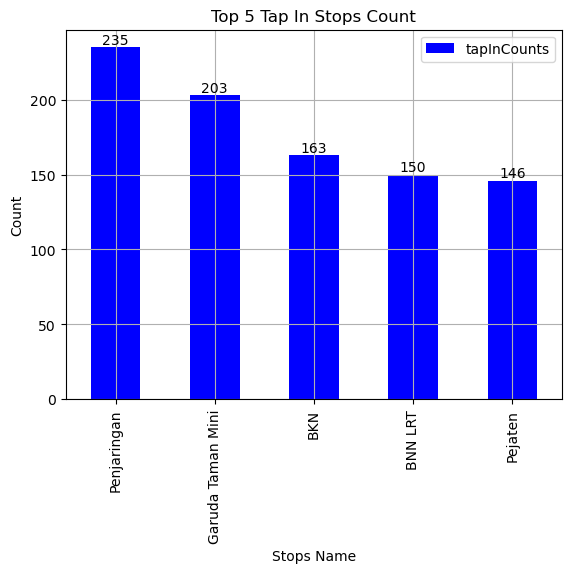

In [53]:
t = tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).head()
ax = t.plot(x='tapInStopsName', kind='bar', color='blue')
# Menambahkan teks di atas setiap bar
for i, v in enumerate(t['tapInCounts']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.grid()
plt.xlabel('Stops Name')
plt.ylabel('Count')
plt.title('Top 5 Tap In Stops Count')
plt.show()

In [54]:
tapIn_counts = data.groupby(['tapInStopsName', 'tapInHour']).size().reset_index(name='tapInCounts')
# tapIn_counts.rename(columns={'tapInStopsName' : 'stopsName'}, inplace=True)
tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).drop_duplicates(subset='tapInStopsName', keep='first')

tapInStopsName  tapInHour  tapInCounts
0     Penjaringan                 17         50         
1     Garuda Taman Mini           6          47         
2     Cibubur Junction            17         41         
3     BKN                         17         39         
4     BNN LRT                     17         38         
...       ...                     ..         ..         
8717  RS Asshobirin 1             14         1          
8718  RS Bhakti Mulia             8          1          
8720  RS Dharma Nugraha           8          1          
8722  Gg. Timbul Jaya Daan Mogot  18         1          
8729  Yos Sudarso Kodamar         11         1          

[2491 rows x 3 columns]

Tap In terbanyak terjadi pada halte Penjaringan pada jam 5 sore, halte Garuda Taman Mini pada jam 6 pagi, halte Cibubur Junctiom pada jam 5 sore, halte BKN pada jam 5 sore dan halte BNN LRT pada jam 5 sore.

In [55]:
tapOut_counts = data.groupby(['tapOutStopsName', 'tapOutHour']).size().reset_index(name='tapOutCounts')
tapOut_counts.rename(columns={'tapOutStopsName' : 'stopsName'}, inplace=True)
t = tapOut_counts.sort_values(by='tapOutCounts', ascending=False, ignore_index=True).head()
t

stopsName  tapOutHour  tapOutCounts
0  BKN           18          48          
1  Masjid Agung  6           38          
2  BKN           7           37          
3  Penjaringan   7           36          
4  BKN           6           36

<Figure size 1000x600 with 0 Axes>

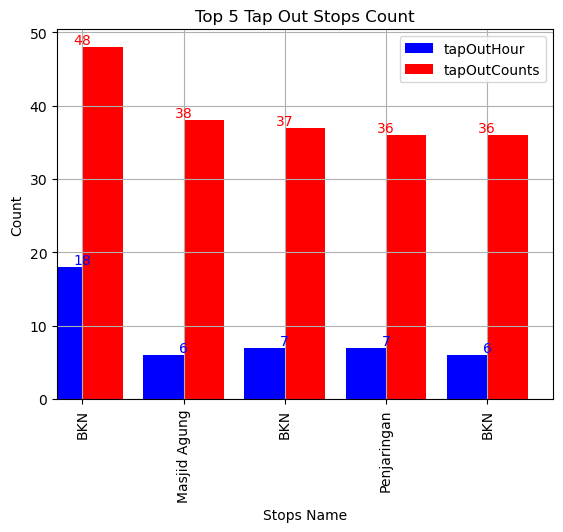

In [56]:
# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Plot bar untuk tapOutHour
ax = t.plot(x='stopsName', y='tapOutHour', kind='bar', color='blue', width=0.4, position=1, label='tapOutHour')

# Plot bar untuk tapOutCounts
t.plot(x='stopsName', y='tapOutCounts', kind='bar', color='red', width=0.4, position=0, label='tapOutCounts', ax=ax)

# Menambahkan teks di atas setiap bar untuk tapOutCounts
for i, v in enumerate(t['tapOutCounts']):
    ax.text(i, v, str(v), ha='center', va='bottom', color='red')

# Menambahkan teks di atas setiap bar untuk tapOutHour
for i, v in enumerate(t['tapOutHour']):
    ax.text(i, v, str(v), ha='center', va='bottom', color='blue')

plt.grid()
plt.xlabel('Stops Name')
plt.ylabel('Count')
plt.title('Top 5 Tap Out Stops Count')
plt.legend()
plt.show()


Sedangkan `tapOut` terbanyak terjadi pada Halte BKN pada jam 6 sore dan 6 pagi, Halte Masjid Agung pada jam 6 pag.

In [57]:
cor = data[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']]
cor.drop_duplicates(inplace=True, ignore_index=True)
cor

tapInStopsName  tapInStopsLat  tapInStopsLon                  tapOutStopsName  tapOutStopsLat  tapOutStopsLon
0     Pal Putih              -6.18          106.84          Tegalan                         -6.20           106.86         
1     Kemenkes 2             -6.23          106.83          Sampoerna Strategic             -6.22           106.82         
2     Gg. Kunir II           -6.13          106.81          Simpang Kunir Kemukus           -6.13           106.81         
3     Taman Elok 1           -6.20          106.94          Raya Penggilingan               -6.18           106.93         
4     Sunter Boulevard Barat -6.15          106.89          Kali Besar Barat                -6.14           106.81         
...                      ...   ...             ...                       ...                  ...              ...         
4339  MTsN 37                -6.10          106.70          Puskesmas Kel. Kamal II         -6.10           106.70         
4340  Sbr. SMPN 252          -6.24          106.94          Jln. Swakarsa III Pondok Kelapa -6.24           106.94         
4341  Tosari                 -6.20          106.82          SMK 57                          -6.29           106.82         
4342  Museum Textile         -6.19          106.81          JPO Blok G                      -6.19           106.81         
4343  Adam Malik             -6.24          106.75          Kebayoran Lama                  -6.24           106.78         

[4344 rows x 6 columns]

In [58]:
res = cor.merge(transcount, on=['tapInStopsName', 'tapOutStopsName'])
res.sort_values(by='TransactionCount', ascending=False, ignore_index=True, inplace=True)
res

tapInStopsName  tapInStopsLat  tapInStopsLon    tapOutStopsName  tapOutStopsLat  tapOutStopsLon  TransactionCount
0     Rusun Kapuk Muara    -6.14          106.76          Penjaringan       -6.13           106.79           125             
1     Penjaringan          -6.13          106.79          Rusun Kapuk Muara -6.14           106.76           117             
2     Garuda Taman Mini    -6.29          106.88          BKN               -6.26           106.87           100             
3     Cibubur Junction     -6.37          106.89          BKN               -6.26           106.87           88              
4     Garuda Taman Mini    -6.29          106.88          Pinang Ranti      -6.29           106.89           85              
...                 ...      ...             ...                   ...        ...              ...           ..              
4339  Rawa Buaya           -6.15          106.73          Kalideres         -6.15           106.71           1               
4340  Simpang Kb. Baru 2   -6.11          106.92          STIP              -6.10           106.96           1               
4341  Karet Sudirman 1     -6.21          106.82          Jln. Bina Harapan -6.25           106.84           1               
4342  SDN Gunung Sahari 01 -6.17          106.84          Jln. Kemuning 1   -6.19           106.86           1               
4343  Adam Malik           -6.24          106.75          Kebayoran Lama    -6.24           106.78           1               

[4344 rows x 7 columns]

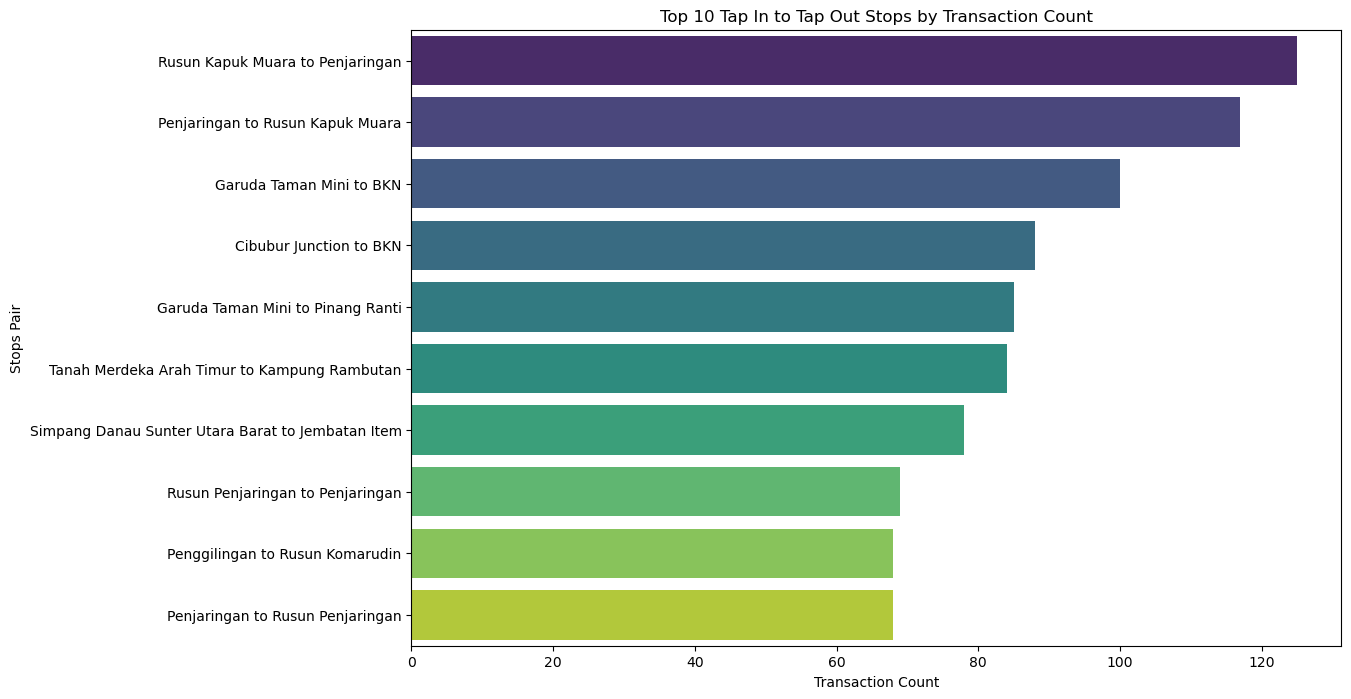

In [59]:
# Menggabungkan tapInStopsName dan tapOutStopsName menjadi satu kolom untuk visualisasi
res['StopsPair'] = res['tapInStopsName'] + " to " + res['tapOutStopsName']

# Mengambil 10 data teratas berdasarkan TransactionCount
top_10_res = res.head(10)

# Mengatur ukuran figure
plt.figure(figsize=(12, 8))

# Membuat barplot
sns.barplot(x='TransactionCount', y='StopsPair', data=top_10_res, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Transaction Count')
plt.ylabel('Stops Pair')
plt.title('Top 10 Tap In to Tap Out Stops by Transaction Count')

# Menampilkan plot
plt.show()

### Insight yang Dapat Diambil:
##### Barplot yang menunjukkan 10 rute paling sering digunakan berdasarkan jumlah transaksi memberikan wawasan penting tentang rute-rute yang paling banyak diminati oleh penumpang:

1. Rute Paling Populer:

- Rusun Kapuk Muara ke Penjaringan dan sebaliknya adalah rute yang paling sering digunakan, dengan lebih dari 120 transaksi tercatat. Ini menunjukkan bahwa rute ini mungkin merupakan rute utama yang banyak digunakan oleh warga sekitar untuk kegiatan sehari-hari.

- Rute-rute lain seperti Garuda Taman Mini ke BKN dan Cibubur Junction ke BKN juga menunjukkan jumlah transaksi yang tinggi, menandakan popularitas rute-rute tersebut.
2. Strategi Optimasi Rute:

- Mengingat tingginya jumlah transaksi di rute-rute tersebut, Transjakarta dapat fokus pada peningkatan kualitas layanan di rute-rute ini, seperti penambahan frekuensi bus atau peningkatan kenyamanan untuk menjaga dan meningkatkan jumlah penumpang.

- Sebaliknya, untuk rute-rute dengan jumlah transaksi rendah, evaluasi lebih lanjut diperlukan untuk menentukan apakah rute tersebut perlu dioptimalkan atau dialihkan untuk efisiensi operasional yang lebih baik.

In [60]:
# Convert TransactionCount to a list
transaction_counts = res['TransactionCount'].values.tolist()

# Define the map
center_latitude = -6.1751
center_longitude = 106.8272
zoom_level = 10
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=zoom_level)

# Add markers for each stop with circle markers
for index, row in res.head(100).iterrows():
    folium.CircleMarker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        radius=row['TransactionCount'] / 10,  # Adjust the size relative to TransactionCount
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        popup=f"Tap In: {row['tapInStopsName']}<br>Transactions: {row['TransactionCount']}"
    ).add_to(m)

    folium.CircleMarker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
        radius=row['TransactionCount'] / 10,  
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Tap Out: {row['tapOutStopsName']}<br>Transactions: {row['TransactionCount']}"
    ).add_to(m)

    # Add a polyline between each pair of tapIn and tapOut stops
    folium.PolyLine(
        locations=[[row['tapInStopsLat'], row['tapInStopsLon']], [row['tapOutStopsLat'], row['tapOutStopsLon']]],
        color='blue',
        weight=2,
        opacity=0.5
    ).add_to(m)

# Display the map
m


In [61]:
# Group by tapInStopsName and calculate the average transaction count
avg_tap_in = res.groupby('tapInStopsName')['TransactionCount'].mean().reset_index()
avg_tap_in.columns = ['StopName', 'AvgTransactionCount']

# Group by tapOutStopsName and calculate the average transaction count
avg_tap_out = res.groupby('tapOutStopsName')['TransactionCount'].mean().reset_index()
avg_tap_out.columns = ['StopName', 'AvgTransactionCount']


In [62]:
# Merge average data with original data to get coordinates
avg_tap_in = pd.merge(avg_tap_in, res[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates(), 
                      left_on='StopName', right_on='tapInStopsName')

avg_tap_out = pd.merge(avg_tap_out, res[['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']].drop_duplicates(), 
                       left_on='StopName', right_on='tapOutStopsName')


In [63]:
import folium
from folium.plugins import MarkerCluster

# Define the map
center_latitude = -6.1751
center_longitude = 106.8272
zoom_level = 10
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=zoom_level)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each stop with circle markers based on the average transaction count
for index, row in avg_tap_in.iterrows():
    folium.CircleMarker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        radius=row['AvgTransactionCount'] / 10,  # Adjust size relative to average TransactionCount
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        popup=f"Tap In: {row['StopName']}<br>Avg Transactions: {row['AvgTransactionCount']:.2f}"
    ).add_to(marker_cluster)

for index, row in avg_tap_out.iterrows():
    folium.CircleMarker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
        radius=row['AvgTransactionCount'] / 10,  
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Tap Out: {row['StopName']}<br>Avg Transactions: {row['AvgTransactionCount']:.2f}"
    ).add_to(marker_cluster)

# Display the map
m


In [64]:
df=data.copy()

### Analisa Peak Hours

tapInHour    5     6    7    8    9  10   11   12   13  14   15   16    17   18   19   20   21
tapDay                                                                                        
Monday     600  1107  524  502  489  14  26   16   35   1   26   600  1008  419  441  430  366
Tuesday    591  1092  525  494  496  16  26   28   20   2   28   593  1014  416  415  440  395
Wednesday  592  1077  478  514  517  28  26   31   17   1   31   611  1017  429  435  389  381
Thursday   621  1070  485  512  503  20  27   21   26   3   37   598  986   451  406  409  399
Friday     619  1084  483  527  513  23  29   23   26   1   34   621  1002  413  441  428  378
Saturday   110  91    91   116  103  88  91   109  99   79  116  111  138   106  109  103  75 
Sunday     101  98    107  114  93   98  102  99   115  80  114  101  116   98   117  127  71

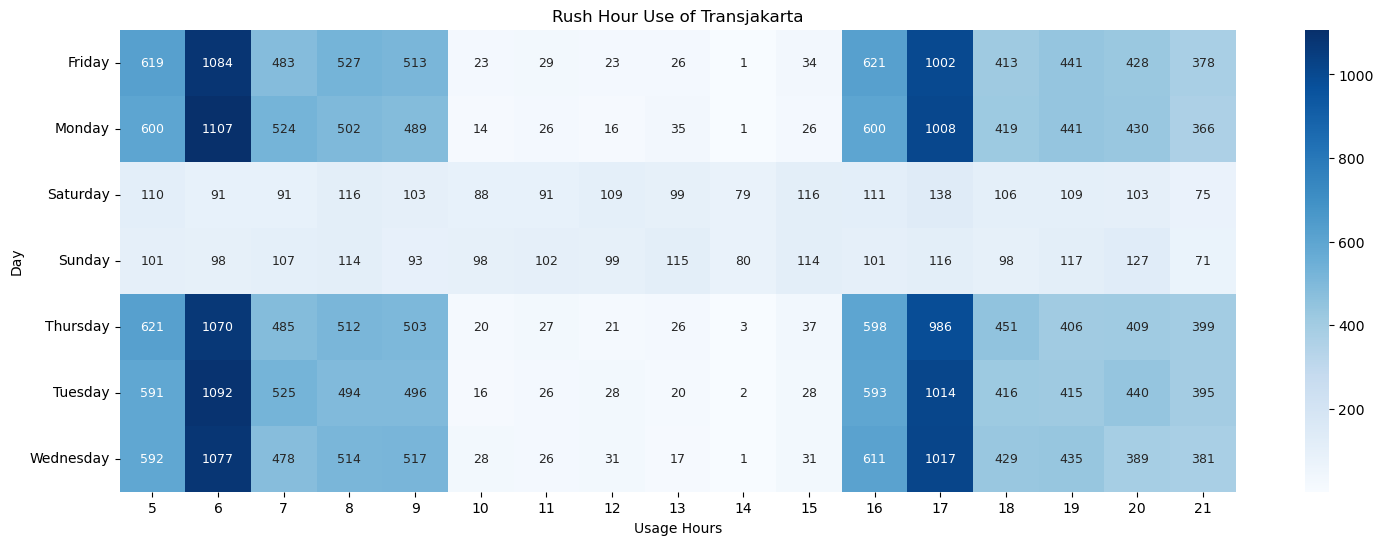

In [65]:
# Peak hour 1 minggu

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = list(range(5, 22))  

peak_hour = pd.crosstab(df['tapDay'], df['tapInHour'])
display(peak_hour.reindex(days))

# Plotting
plt.figure(figsize=(18, 6))

sns.heatmap(peak_hour, annot=True,
            annot_kws={'size': 9}, fmt='.0f',
            cmap='Blues'
            )
plt.xlabel('Usage Hours')
plt.ylabel('Day')
plt.title('Rush Hour Use of Transjakarta')

# Mengubah data dari crosstab ke format yang bisa dipakai di plotly
data = []
for day in days:
    trace = go.Scatter(
        x=hours,
        y=peak_hour.loc[day].values,
        mode='lines+markers',
        name=day
    )
    data.append(trace)

# Layout plot
layout = go.Layout(
    title='Transjakarta Usage Over Hours in a Week',
    xaxis=dict(title='Usage Hours'),
    yaxis=dict(title='Number of Users'),
)

# Membuat dan menampilkan plot
fig = go.Figure(data=data, layout=layout)
iplot(fig)

plt.show()

In [66]:
peak_hour

tapInHour    5     6    7    8    9  10   11   12   13  14   15   16    17   18   19   20   21
tapDay                                                                                        
Friday     619  1084  483  527  513  23  29   23   26   1   34   621  1002  413  441  428  378
Monday     600  1107  524  502  489  14  26   16   35   1   26   600  1008  419  441  430  366
Saturday   110  91    91   116  103  88  91   109  99   79  116  111  138   106  109  103  75 
Sunday     101  98    107  114  93   98  102  99   115  80  114  101  116   98   117  127  71 
Thursday   621  1070  485  512  503  20  27   21   26   3   37   598  986   451  406  409  399
Tuesday    591  1092  525  494  496  16  26   28   20   2   28   593  1014  416  415  440  395
Wednesday  592  1077  478  514  517  28  26   31   17   1   31   611  1017  429  435  389  381

### Insight yang Dapat Diambil:

Berdasarkan tabel dan heatmap di atas yang menggambarkan jam sibuk (peak hours) penggunaan Transjakarta selama seminggu, dapat diambil beberapa kesimpulan:

1. Jam Sibuk Pagi (5:00 - 9:00 AM):

- Senin hingga Jumat menunjukkan peningkatan signifikan dalam jumlah pengguna antara pukul 5:00 hingga 9:00. Jam 7:00 hingga 8:00 pagi adalah yang paling sibuk, terutama pada hari Senin dan Selasa, dengan masing-masing 582 dan 569 penumpang pada jam 7:00 pagi.
- Hari Rabu, Kamis, dan Jumat juga menunjukkan pola serupa, meskipun dengan sedikit penurunan jumlah penumpang dibandingkan hari Senin dan Selasa.
- Akhir pekan (Sabtu dan Minggu) menunjukkan aktivitas yang jauh lebih rendah pada jam-jam ini, dengan jumlah penumpang yang cukup konstan di bawah 100.

2. Jam Sibuk Sore (15:00 - 18:00 PM):

- Jam sibuk kedua terjadi pada sore hari antara pukul 15:00 hingga 18:00, dengan puncaknya sekitar pukul 17:00.
- Pada hari Jumat, pukul 17:00 adalah yang paling sibuk dengan 531 penumpang, diikuti oleh hari Kamis dan Senin yang juga memiliki angka yang tinggi pada jam ini, masing-masing 529 penumpang.
- Hal ini menunjukkan bahwa banyak pengguna Transjakarta yang melakukan perjalanan pulang kerja pada sore hari ini.

3. Hari Teramai:

- Secara keseluruhan, hari-hari kerja (Senin hingga Jumat) menunjukkan pola penggunaan yang sangat sibuk baik pada pagi maupun sore hari, dengan hari Senin, Selasa, dan Jumat menjadi yang paling sibuk.
- Sebaliknya berdasarkan lineplot diatas, dapat diketahui trend penggunaan transjakarta perhari selama periode april 2023. Trend berfluktuasi sesuai dengan pola hari kerja dan akhir pekan.
- pada akhir pekan trend jumlah penumpang cenderung mengalami penurunan yang signifikan.

4. Insight Tambahan:

- Data ini menunjukkan pentingnya mengalokasikan armada bus tambahan pada jam-jam sibuk di pagi dan sore hari selama hari kerja untuk mengatasi lonjakan penumpang.
- Hari Jumat khususnya, menunjukkan lonjakan penggunaan di sore hari yang mungkin terkait dengan berbagai kegiatan sebelum akhir pekan, sehingga perlu perhatian ekstra untuk alokasi sumber daya pada hari tersebut.

In [67]:
weekend_df = df[df['tapDay'].isin(['Saturday', 'Sunday'])]


In [68]:
weekend_rush_hour = pd.crosstab(weekend_df['tapDay'], weekend_df['tapInHour'])
weekend_rush_hour

tapInHour    5   6    7    8    9  10   11   12   13  14   15   16   17   18   19   20  21
tapDay                                                                                    
Saturday   110  91  91   116  103  88  91   109  99   79  116  111  138  106  109  103  75
Sunday     101  98  107  114  93   98  102  99   115  80  114  101  116  98   117  127  71

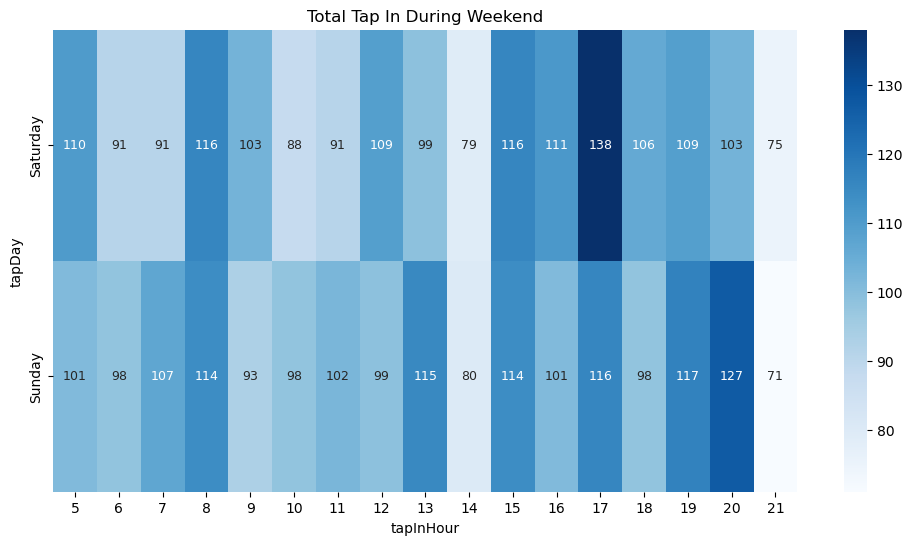

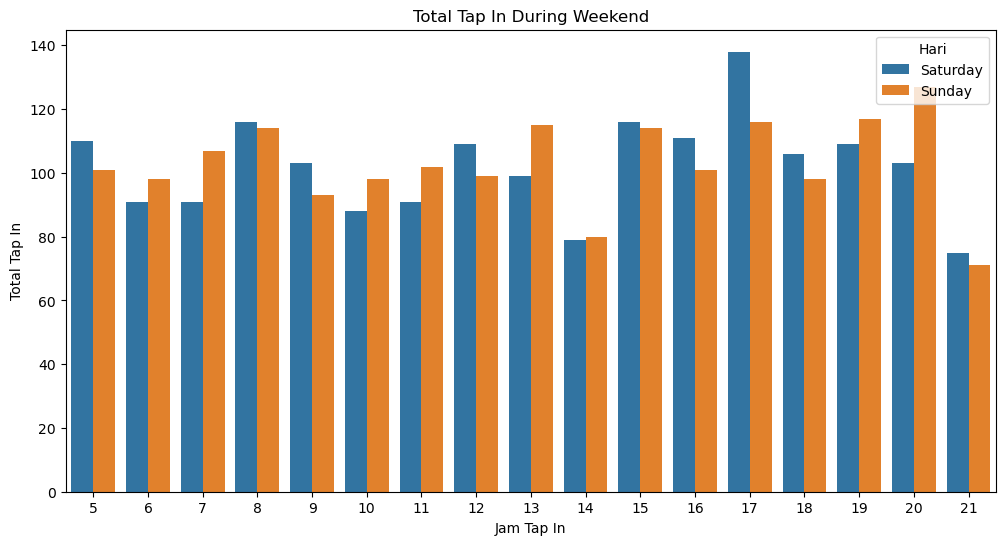

In [69]:
plt.figure(figsize=(12,6))
sns.heatmap(weekend_rush_hour, annot=True, 
            annot_kws={'size':9}, fmt='.0f',
            cmap='Blues')
plt.title('Total Tap In During Weekend')

# Melebur weekend_rush_hour untuk membuat DataFrame yang panjang
weekend_melted = weekend_rush_hour.reset_index().melt(id_vars='tapDay', var_name='tapInHour', value_name='total')

# Membuat barplot untuk total jumlah tap-in per jam pada akhir pekan
plt.figure(figsize=(12, 6))
sns.barplot(x='tapInHour', y='total', hue='tapDay', data=weekend_melted)

# Menambahkan label dan judul
plt.xlabel('Jam Tap In')
plt.ylabel('Total Tap In')
plt.title('Total Tap In During Weekend')
plt.legend(title='Hari', loc='upper right')

plt.show()

### Insight yang Dapat Diambil:

1. Jam Sibuk (Peak Hours):

- Pada hari Sabtu, jam sibuk terjadi pada sore hari antara jam 16:00 hingga 18:00 dengan puncaknya pada pukul 17:00.

- Pada hari Minggu, pola yang mirip terlihat, namun dengan sedikit penurunan jumlah tap-in.

2. Penggunaan Pagi Hari:
- Hari Minggu cenderung lebih sibuk pada pagi hari dibandingkan hari Sabtu.

3. Rekomendasi:
- Manajemen Transjakarta dapat mempertimbangkan penambahan armada atau frekuensi bus pada sore hari, terutama pada jam 17:00 di hari Sabtu, untuk mengatasi lonjakan penumpang atau melakukan pengaturan jadwal pada hari Minggu dapat disesuaikan untuk mengakomodasi pengguna di pagi hari.

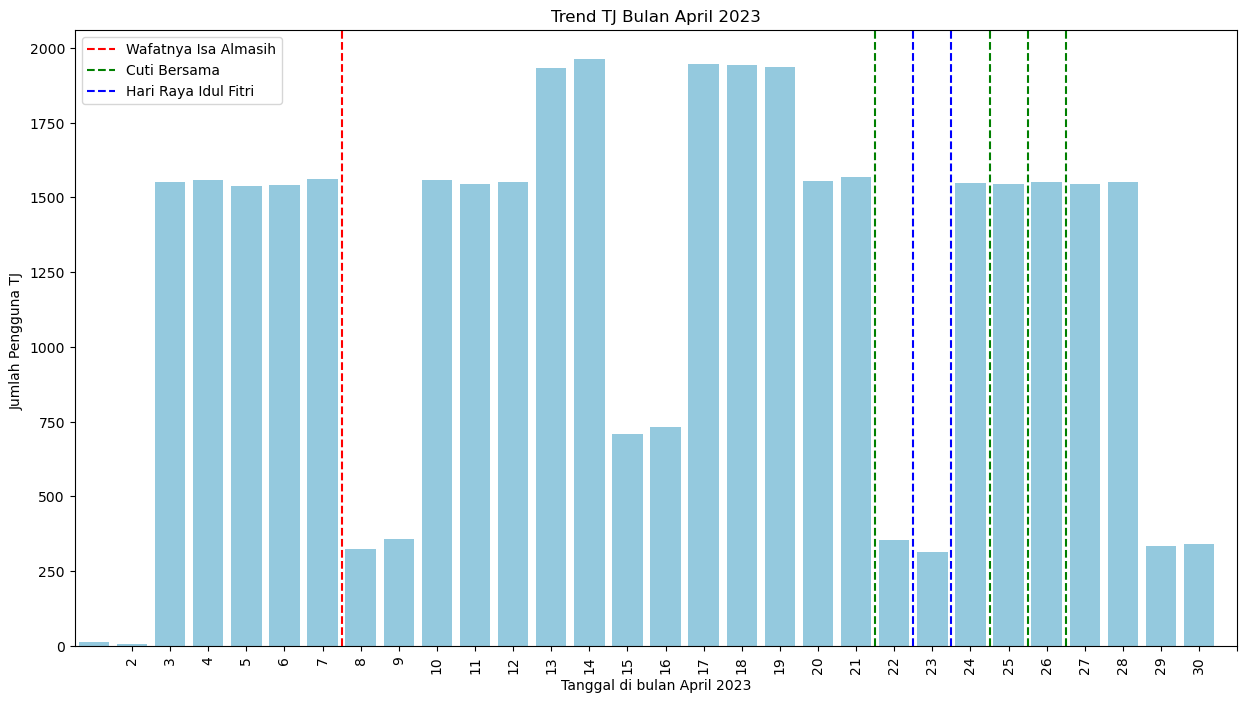

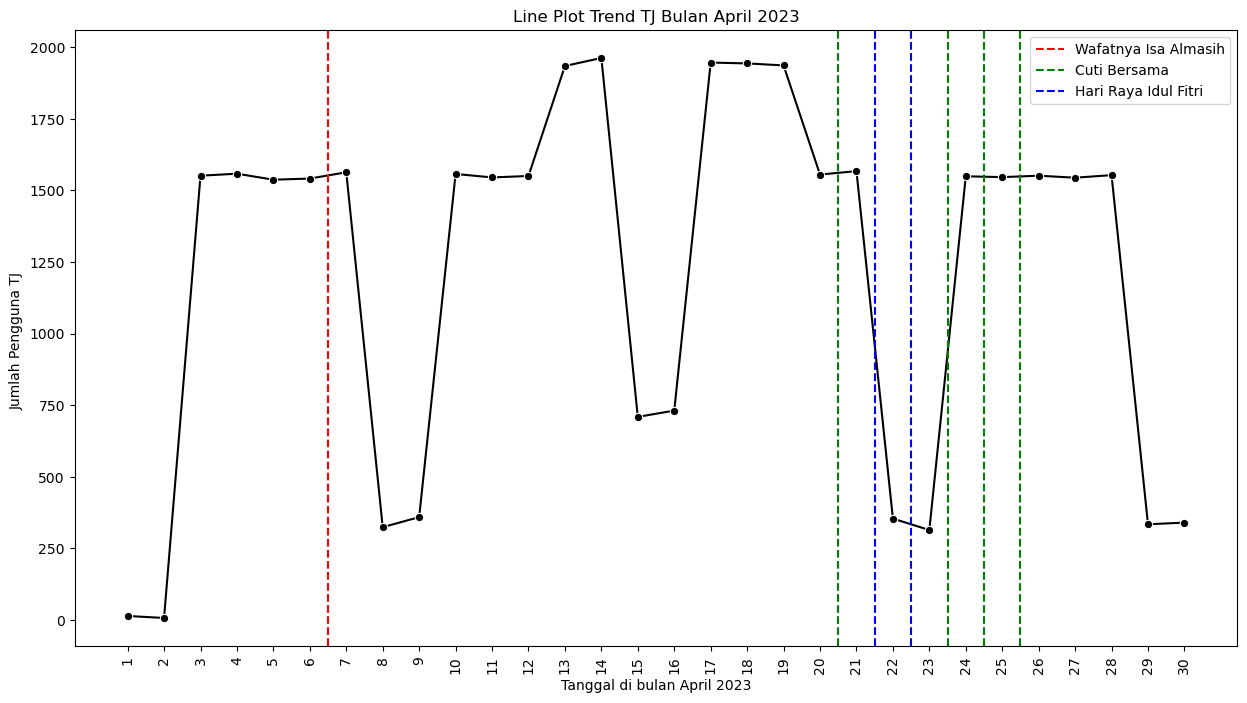

In [70]:
# Buat plot
plt.figure(figsize=(15,8))
days = df['date'].value_counts().reset_index().sort_values('date')
sns.barplot(data=days, x='date', y='count', color='skyblue')
plt.xticks(np.arange(1, 31, 1), rotation=90)
plt.xlabel('Tanggal di bulan April 2023')
plt.ylabel('Jumlah Pengguna TJ ')
plt.title('Trend TJ Bulan April 2023')

# Tambahkan garis putus-putus untuk hari besar dan cuti bersama
plt.axvline(x=6.5, linestyle='--', color='red', label='Wafatnya Isa Almasih')
plt.axvline(x=20.5, linestyle='--', color='green', label='Cuti Bersama')
plt.axvline(x=21.5, linestyle='--', color='blue', label='Hari Raya Idul Fitri')
plt.axvline(x=22.5, linestyle='--', color='blue', label='_nolegend_')
plt.axvline(x=23.5, linestyle='--', color='green', label='_nolegend_')
plt.axvline(x=24.5, linestyle='--', color='green', label='_nolegend_')
plt.axvline(x=25.5, linestyle='--', color='green', label='_nolegend_')

# Tambahkan legenda
plt.legend()

# Buat line plot untuk visualisasi tren pengguna TJ
plt.figure(figsize=(15,8))
sns.lineplot(data=days, x='date', y='count', marker='o', color='black')
plt.xticks(np.arange(1, 31, 1), rotation=90)
plt.xlabel('Tanggal di bulan April 2023')
plt.ylabel('Jumlah Pengguna TJ ')
plt.title('Line Plot Trend TJ Bulan April 2023')

# Tambahkan garis putus-putus untuk hari besar dan cuti bersama
plt.axvline(x=6.5, linestyle='--', color='red', label='Wafatnya Isa Almasih')
plt.axvline(x=20.5, linestyle='--', color='green', label='Cuti Bersama')
plt.axvline(x=21.5, linestyle='--', color='blue', label='Hari Raya Idul Fitri')
plt.axvline(x=22.5, linestyle='--', color='blue', label='_nolegend_')
plt.axvline(x=23.5, linestyle='--', color='green', label='_nolegend_')
plt.axvline(x=24.5, linestyle='--', color='green', label='_nolegend_')
plt.axvline(x=25.5, linestyle='--', color='green', label='_nolegend_')

# Tambahkan legenda
plt.legend()

# Tampilkan plot
plt.show()


### 1. Hari besar berada pada tanggal
- 7 April 2023 (Jumat): Wafatnya Isa Almasih
- 22 April 2023 (Sabtu): Hari Raya Idul Fitri 1444 H
- 23 April 2023 (Minggu): Hari Raya Idul Fitri 1444 H
### 2.  Daftar cuti bersama April 2023:
- 21 April 2023 (Jumat): Hari Raya Idul Fitri 1444 H
- 24 April 2023 (Senin): Hari Raya Idul Fitri 1444 H
- 25 April 2023 (Selasa): Hari Raya Idul Fitri 1444 H
- 26 April 2023 (Rabu): Hari Raya Idul Fitri 1444 H

In [71]:
# Pilih data hanya untuk tanggal-tanggal yang diberikan
red_days_data = df[df['date'].isin([7, 21, 24, 25, 26])]

# Hitung frekuensi masing-masing tanggal
red_days_data = red_days_data['date'].value_counts().reset_index().sort_values('date')

# Menghitung rata-rata dari kolom 'count'
mean_count_redDay = round(red_days_data['count'].mean(),2)
print('Rata-rata harian tingkat kepadatan transjakarta untuk hari-hari besar (tanggal merah) adalah sebesar ',(mean_count_redDay))

# Pilih data untuk weekdays selain hari besar
weekdays_data = df[(~df['date'].isin([7, 21, 24, 25, 26])) &(df['date'].isin([3,4,5,6,10,11,12,13,14,17,18,19,20,24,25,26,27,28]))]

# Hitung frekuensi masing-masing tanggal
weekdays_data = weekdays_data['date'].value_counts().reset_index().sort_values('date')

# Menghitung rata-rata kepadatan untuk hari kerja (weekdays)
mean_count_weekdays = round(weekdays_data['count'].mean(),2)

print('Rata-rata harian tingkat kepadatan Transjakarta untuk hari kerja (weekdays) adalah sebesar',(mean_count_weekdays))

Rata-rata harian tingkat kepadatan transjakarta untuk hari-hari besar (tanggal merah) adalah sebesar  1555.2
Rata-rata harian tingkat kepadatan Transjakarta untuk hari kerja (weekdays) adalah sebesar 1680.8


### 1. Insight yang Dapat Diambil:
- Penggunaan TJ Cenderung Stabil pada Hari Besar: Meskipun ada hari libur nasional, masyarakat masih tetap menggunakan TJ dengan jumlah yang cukup signifikan.
- Hari Kerja Menjadi Puncak Penggunaan: Sesuai ekspektasi, hari kerja memiliki kepadatan pengguna TJ yang lebih tinggi dibandingkan hari libur nasional.
- Penurunan Ekstrem pada Tanggal Tertentu: Penurunan drastis pada tanggal-tanggal seperti 11 April dan 22 April perlu diteliti lebih lanjut untuk memahami penyebabnya, apakah terkait dengan faktor eksternal seperti cuaca, kebijakan transportasi, atau peristiwa tertentu.
### 2. Kesimpulan:
Secara keseluruhan, data menunjukkan bahwa penggunaan TJ relatif stabil dengan sedikit fluktuasi pada hari-hari besar. Hari kerja tetap menjadi puncak penggunaan TJ, sementara penurunan yang signifikan pada beberapa tanggal tertentu memerlukan analisis lebih lanjut. Ini bisa menjadi dasar bagi pengelola TJ untuk menyesuaikan layanan dan kebijakan selama hari libur nasional atau saat terjadi penurunan tajam dalam jumlah pengguna.

In [72]:
#filter 3500
df=df[df['payAmount']==3500]

#define banyak halte
df['banyak_halte']=df['stopEndSeq']-df['stopStartSeq']


In [73]:
df['banyak_halte'].describe()

count   18798.00
mean    6.29    
std     6.03    
min     1.00    
25%     2.00    
50%     4.00    
75%     9.00    
max     46.00   
Name: banyak_halte, dtype: float64

In [74]:
#buat skema di normal hour 09.00-16.00
df['amount2']=np.where(df['banyak_halte']<=3,2000,
              np.where(df['banyak_halte']<=5,3000,
              np.where(df['banyak_halte']<=7,4000,
              np.where(df['banyak_halte']<=9,5000,
              np.where(df['banyak_halte']<=11,6000,
              np.where(df['banyak_halte']<=13,7000,
              np.where(df['banyak_halte']<=15,8000,
              np.where(df['banyak_halte']<=17,9000,
              np.where(df['banyak_halte']<=19,10000,10000)))))))))

In [75]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['date_tap'] = df['tapInTime'].dt.date
df['date_tap'] =pd.to_datetime(df['date_tap'])

In [76]:
df2=df.groupby('date_tap')[['payAmount','amount2']].sum().reset_index()
df2['cumsum_payAmount']=df2['payAmount'].cumsum()
df2['cumsum_amount2']=df2['amount2'].cumsum()
df2

date_tap  payAmount  amount2  cumsum_payAmount  cumsum_amount2
0  2023-04-01 28000.00    31000   28000.00           31000         
1  2023-04-02 17500.00    27000   45500.00           58000         
2  2023-04-03 2789500.00  3156000 2835000.00         3214000       
3  2023-04-04 2779000.00  3142000 5614000.00         6356000       
4  2023-04-05 2765000.00  3144000 8379000.00         9500000       
5  2023-04-06 2768500.00  3157000 11147500.00        12657000      
6  2023-04-07 2817500.00  3169000 13965000.00        15826000      
7  2023-04-08 605500.00   638000  14570500.00        16464000      
8  2023-04-09 623000.00   706000  15193500.00        17170000      
9  2023-04-10 2803500.00  3186000 17997000.00        20356000      
10 2023-04-11 2793000.00  3171000 20790000.00        23527000      
11 2023-04-12 2775500.00  3146000 23565500.00        26673000      
12 2023-04-13 3500000.00  3911000 27065500.00        30584000      
13 2023-04-14 3563000.00  3989000 30628500.00        34573000      
14 2023-04-15 1284500.00  1486000 31913000.00        36059000      
15 2023-04-16 1344000.00  1421000 33257000.00        37480000      
16 2023-04-17 3531500.00  3930000 36788500.00        41410000      
17 2023-04-18 3517500.00  3938000 40306000.00        45348000      
18 2023-04-19 3528000.00  3933000 43834000.00        49281000      
19 2023-04-20 2786000.00  3162000 46620000.00        52443000      
20 2023-04-21 2852500.00  3242000 49472500.00        55685000      
21 2023-04-22 682500.00   762000  50155000.00        56447000      
22 2023-04-23 574000.00   647000  50729000.00        57094000      
23 2023-04-24 2793000.00  3189000 53522000.00        60283000      
24 2023-04-25 2810500.00  3181000 56332500.00        63464000      
25 2023-04-26 2786000.00  3141000 59118500.00        66605000      
26 2023-04-27 2786000.00  3158000 61904500.00        69763000      
27 2023-04-28 2814000.00  3189000 64718500.00        72952000      
28 2023-04-29 549500.00   619000  65268000.00        73571000      
29 2023-04-30 525000.00   556000  65793000.00        74127000

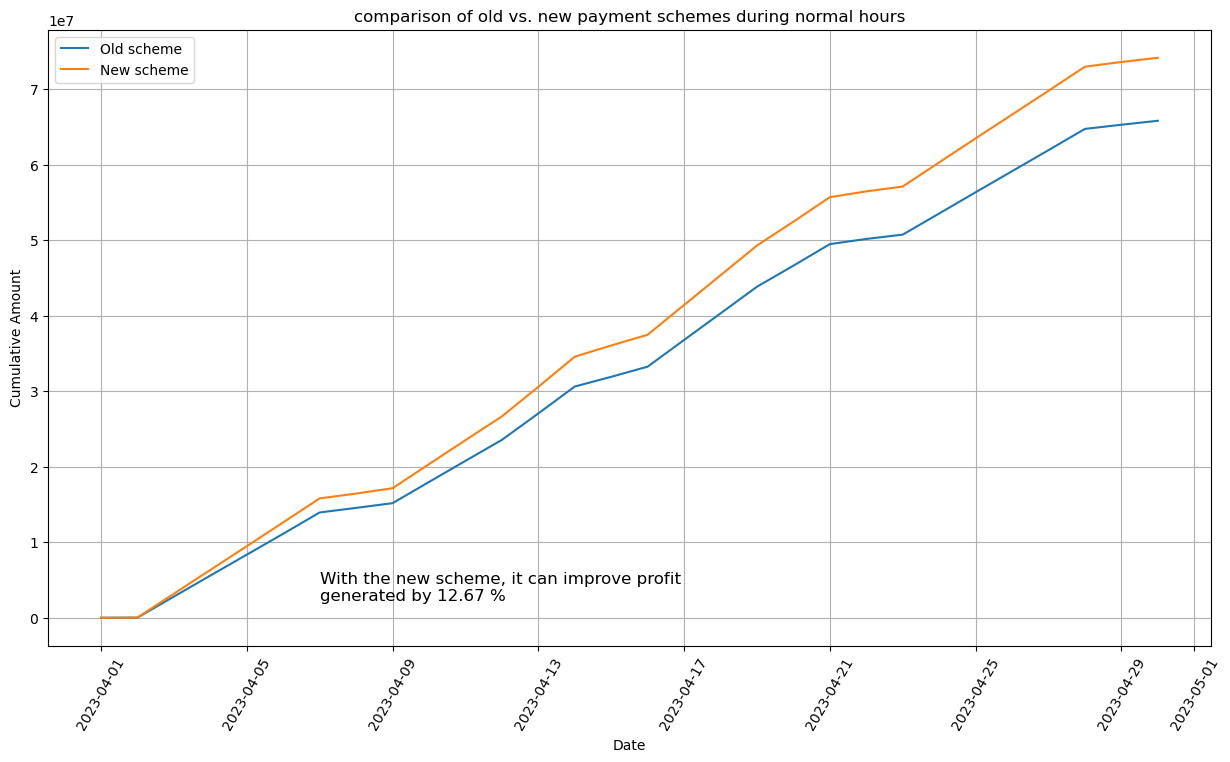

In [77]:
plt.figure(figsize=(15, 8))  # Ubah ukuran figure menjadi lebih kecil
sns.lineplot(x='date_tap', y='cumsum_payAmount', data=df2, label='Old scheme')
sns.lineplot(x='date_tap', y='cumsum_amount2', data=df2, label='New scheme')
plt.xlabel('Date')
plt.ylabel('Cumulative Amount')
plt.xticks(rotation=60)
plt.title('comparison of old vs. new payment schemes during normal hours')
plt.legend()
plt.grid()

# Tentukan posisi teks anotasi dengan rentang yang lebih masuk akal
max_value = round(100*(df2['cumsum_amount2'].max()-df2['cumsum_payAmount'].max())/df2['cumsum_payAmount'].max(),2)
text = f'''
With the new scheme, it can improve profit 
generated by {max_value} %
'''
plt.text(df2['date_tap'].iloc[len(df2)//5], max_value*0.8, text, fontsize=12)

plt.show()


### Insight yang Dapat Diambil::
- Skema pembayaran baru dengan struktur tarif yang bertingkat (Rp 2000 untuk tiga halte pertama, kemudian bertambah Rp 1000 setiap dua halte hingga mencapai maksimal Rp 10000) terbukti lebih efektif dalam menghasilkan pendapatan dibandingkan skema pembayaran lama.

### Rekomendasi: 
Dengan peningkatan pendapatan sebesar 12,67% menggunakan skema baru, direkomendasikan untuk melanjutkan penggunaan skema pembayaran ini. Selain itu, perlu juga dipertimbangkan kemungkinan penyesuaian lebih lanjut pada struktur tarif untuk mengoptimalkan pendapatan tanpa mengorbankan jumlah penumpang.

In [78]:
#buat skema di peak hour 05.00-09.00 dan 16.00-21.00
df['amount2']=np.where(df['banyak_halte']<=3,2000,
              np.where(df['banyak_halte']<=5,4000,
              np.where(df['banyak_halte']<=7,6000,
              np.where(df['banyak_halte']<=9,8000,
              np.where(df['banyak_halte']<=11,10000,
              np.where(df['banyak_halte']<=13,12000,
              np.where(df['banyak_halte']<=15,14000,14000)))))))

In [79]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['date_tap'] = df['tapInTime'].dt.date
df['date_tap'] =pd.to_datetime(df['date_tap'])

In [80]:
df3=df.groupby('date_tap')[['payAmount','amount2']].sum().reset_index()
df3['cumsum_payAmount']=df3['payAmount'].cumsum()
df3['cumsum_amount2']=df3['amount2'].cumsum()
df3

date_tap  payAmount  amount2  cumsum_payAmount  cumsum_amount2
0  2023-04-01 28000.00    44000   28000.00           44000         
1  2023-04-02 17500.00    40000   45500.00           84000         
2  2023-04-03 2789500.00  4478000 2835000.00         4562000       
3  2023-04-04 2779000.00  4454000 5614000.00         9016000       
4  2023-04-05 2765000.00  4466000 8379000.00         13482000      
5  2023-04-06 2768500.00  4484000 11147500.00        17966000      
6  2023-04-07 2817500.00  4496000 13965000.00        22462000      
7  2023-04-08 605500.00   898000  14570500.00        23360000      
8  2023-04-09 623000.00   1000000 15193500.00        24360000      
9  2023-04-10 2803500.00  4522000 17997000.00        28882000      
10 2023-04-11 2793000.00  4506000 20790000.00        33388000      
11 2023-04-12 2775500.00  4464000 23565500.00        37852000      
12 2023-04-13 3500000.00  5516000 27065500.00        43368000      
13 2023-04-14 3563000.00  5634000 30628500.00        49002000      
14 2023-04-15 1284500.00  2108000 31913000.00        51110000      
15 2023-04-16 1344000.00  2000000 33257000.00        53110000      
16 2023-04-17 3531500.00  5540000 36788500.00        58650000      
17 2023-04-18 3517500.00  5572000 40306000.00        64222000      
18 2023-04-19 3528000.00  5556000 43834000.00        69778000      
19 2023-04-20 2786000.00  4486000 46620000.00        74264000      
20 2023-04-21 2852500.00  4614000 49472500.00        78878000      
21 2023-04-22 682500.00   1080000 50155000.00        79958000      
22 2023-04-23 574000.00   922000  50729000.00        80880000      
23 2023-04-24 2793000.00  4532000 53522000.00        85412000      
24 2023-04-25 2810500.00  4506000 56332500.00        89918000      
25 2023-04-26 2786000.00  4450000 59118500.00        94368000      
26 2023-04-27 2786000.00  4482000 61904500.00        98850000      
27 2023-04-28 2814000.00  4520000 64718500.00        103370000     
28 2023-04-29 549500.00   884000  65268000.00        104254000     
29 2023-04-30 525000.00   762000  65793000.00        105016000

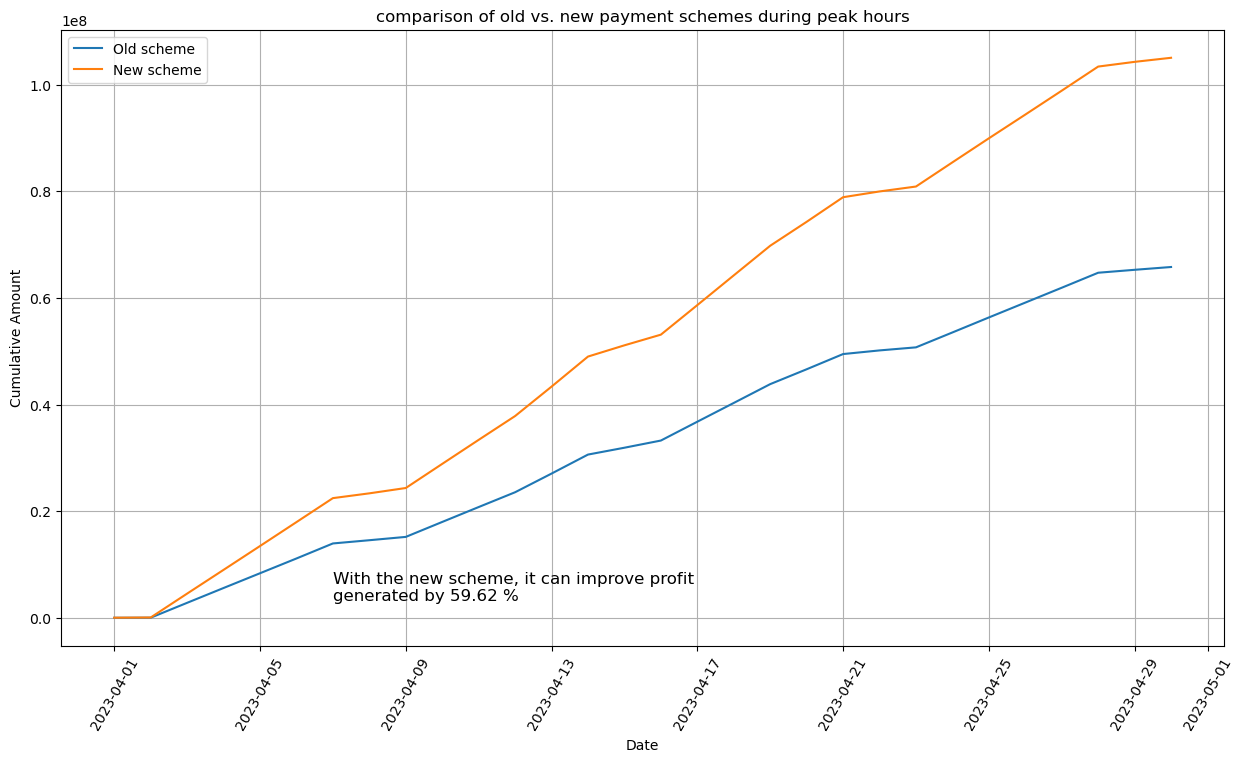

In [81]:
plt.figure(figsize=(15, 8))  # Ubah ukuran figure menjadi lebih kecil
sns.lineplot(x='date_tap', y='cumsum_payAmount', data=df3, label='Old scheme')
sns.lineplot(x='date_tap', y='cumsum_amount2', data=df3, label='New scheme')
plt.xlabel('Date')
plt.ylabel('Cumulative Amount')
plt.xticks(rotation=60)
plt.title('comparison of old vs. new payment schemes during peak hours')
plt.legend()
plt.grid()

# Tentukan posisi teks anotasi dengan rentang yang lebih masuk akal
max_value = round(100*(df3['cumsum_amount2'].max()-df3['cumsum_payAmount'].max())/df3['cumsum_payAmount'].max(),2)
text = f'''
With the new scheme, it can improve profit 
generated by {max_value} %
'''
plt.text(df3['date_tap'].iloc[len(df3)//5], max_value*0.8, text, fontsize=12)

plt.show()


### Insight yang Dapat Diambil:

- Skema tarif baru yang diterapkan oleh TransJakarta pada jam sibuk menunjukkan peningkatan yang signifikan dalam hal total pendapatan dibandingkan dengan skema lama.
- Dengan skema baru, di mana tarif meningkat setiap melewati dua halte dengan maksimum Rp 14.000, perusahaan berhasil meningkatkan profit hingga 59.62%.
### Rekomendasi:

- Lanjutkan Implementasi Skema Baru: Mengingat dampak positif yang signifikan pada pendapatan, disarankan untuk melanjutkan dan mungkin memperluas penerapan skema tarif baru ini.
- Evaluasi Lanjutan: Perusahaan perlu terus mengevaluasi efektivitas skema baru ini dalam jangka panjang, termasuk memantau reaksi pelanggan dan memastikan tarif tetap kompetitif dan adil.
- Komunikasi Efektif: Pastikan komunikasi yang jelas kepada penumpang mengenai tarif baru ini untuk menghindari kebingungan dan meningkatkan penerimaan tarif oleh masyarakat.

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# **KESIMPULAN AKHIR**


### 1. Rute Paling Populer:

- Rute dari Rusun Kapuk Muara ke Penjaringan adalah yang paling sering digunakan. Fokus peningkatan kualitas layanan di rute-rute dengan transaksi tinggi dan evaluasi rute dengan transaksi rendah.

### 2. Jam Sibuk TransJakarta:

- Senin hingga Jumat pagi (5:00 - 9:00) dan sore (15:00 - 18:00) adalah jam paling sibuk. Hari Senin, Selasa, dan Jumat menunjukkan penggunaan tertinggi.

### 3. Akhir Pekan:

- Sabtu dan Minggu memiliki pola penggunaan yang berbeda, dengan Sabtu lebih sibuk pada sore hari dan Minggu pada pagi hari.

### 4. Hari Besar dan Libur:

- Penggunaan TransJakarta tetap stabil meskipun ada hari libur nasional, dengan hari kerja tetap menjadi puncak penggunaan. Penurunan drastis pada tanggal tertentu perlu dianalisis lebih lanjut.

### 5. Efektivitas Skema Tarif Baru:

- Skema tarif baru terbukti lebih efektif, dengan peningkatan pendapatan sebesar 12.67% pada kondisi normal dan 59.62% selama jam sibuk.

# **REKOMENDASI**

### 1. Peningkatan Layanan:

- Tambah frekuensi bus dan tingkatkan kualitas layanan pada rute-rute populer dan jam sibuk untuk menjaga kepuasan penumpang.

### 2. Evaluasi Berkelanjutan:

- Terus pantau dan evaluasi efektivitas skema tarif baru dan dampaknya terhadap jumlah penumpang.

### 3. Komunikasi yang Jelas:

Pastikan komunikasi yang efektif kepada penumpang terkait perubahan skema tarif untuk menghindari kebingungan dan meningkatkan penerimaan.

### 4. Penyesuaian pada Akhir Pekan:

- Pertimbangkan penambahan armada pada sore hari Sabtu dan penyesuaian jadwal pada pagi hari Minggu untuk mengakomodasi lonjakan penumpang.